In [1]:
%load_ext autoreload
%autoreload 2

In [109]:
from wdtools import *

In [91]:
setID = 'Set002'

In [92]:
matched = gpd.read_file(outpath + f'\\matched\\matched_records_{setID}_edited.shp')
mapped = gpd.read_file(outpath + f'\\final\\mapped_wd_{setID}.shp')

In [7]:
comp_mat = matched[matched.wdID.isin(mapped[mapped.code==0].wdID.unique())]

In [13]:
comp_mat.head(3)

wdID       trsqq parcel_id notes  lots   lot  \
1  WD2017-0033    08N08W25       101  None   101   101   
6  WD2017-0078  05N10W19AA      6600  None  6600  6600   
7  WD2017-0355  05N10W19AA      6600  None  6600  6600   

                        ORTaxlot  record_ID  \
1  0408.00N08.00W2500--000000101          2   
6  0405.00N10.00W19AA--000006600          6   
7  0405.00N10.00W19AA--000006600         18   

                                            geometry  
1  POLYGON ((524028.003 1621190.023, 524220.072 1...  
6  POLYGON ((431005.623 1534096.897, 431004.237 1...  
7  POLYGON ((431005.623 1534096.897, 431004.237 1...

In [16]:
# single parcel id in the matched records
sig_pcl_mat = comp_mat[~comp_mat.lots.str.contains(',')]
# two and plus in the matched records
twp_pcl_mat = comp_mat[comp_mat.lots.str.contains(',')]

In [21]:
# dissolve the polygons by record ID
twp_pcl_mat_dis = twp_pcl_mat.drop(columns=['lot', 'ORTaxlot'])
twp_pcl_mat_dis = twp_pcl_mat_dis.dissolve('record_ID')
twp_pcl_mat_dis.loc[:, 'record_ID'] = twp_pcl_mat_dis.index

In [24]:
twp_pcl_mat_dis.shape

(286, 7)

In [28]:
import matplotlib.pyplot as plt

<ipython-input-33-f3feafec7c0e>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig, ax = plt.subplots(figsize = (10,10))


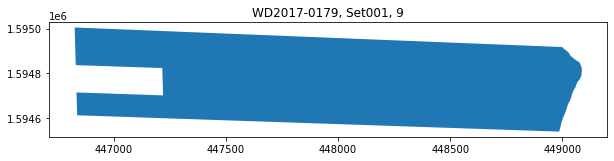

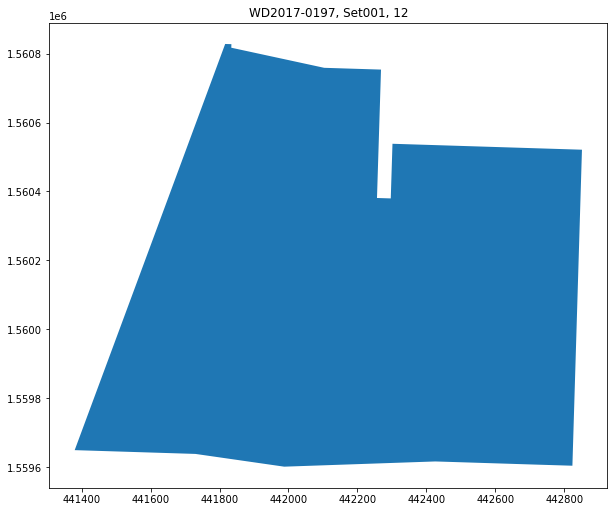

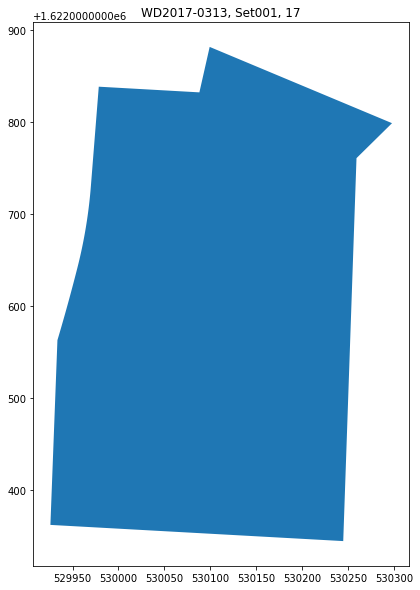

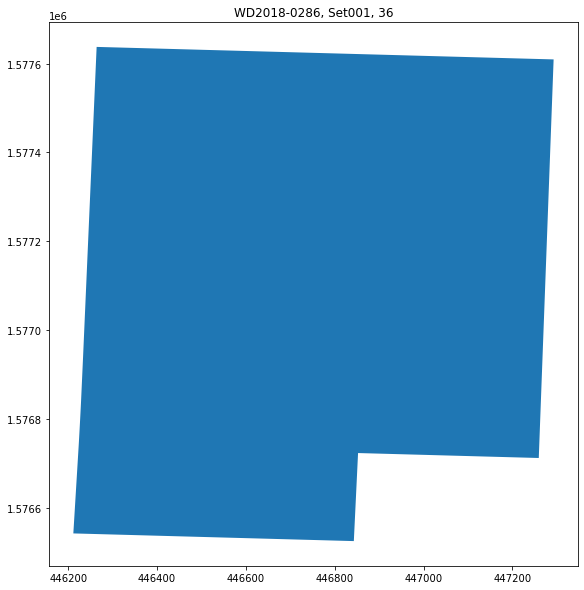

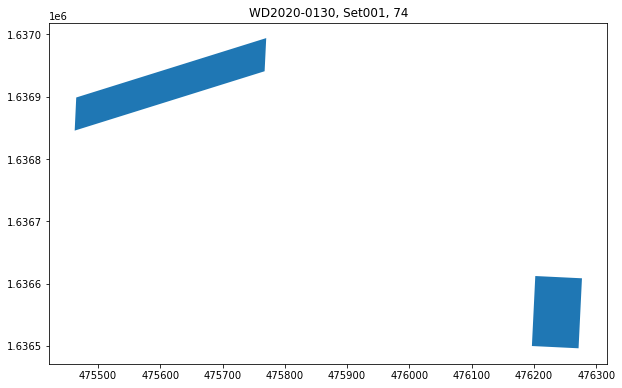

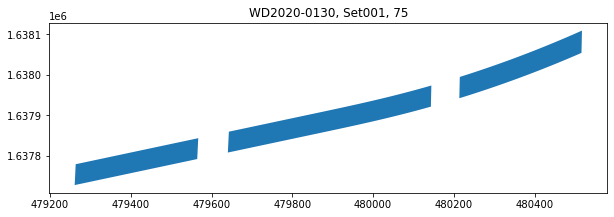

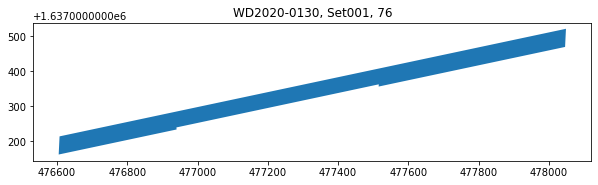

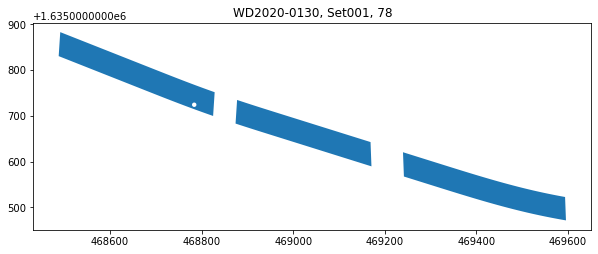

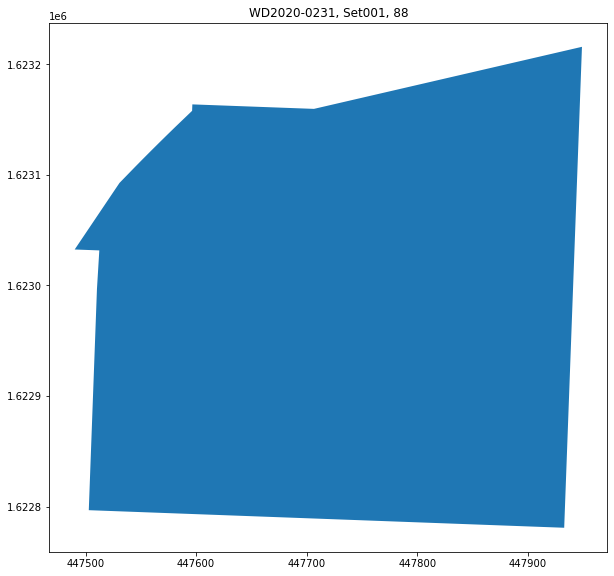

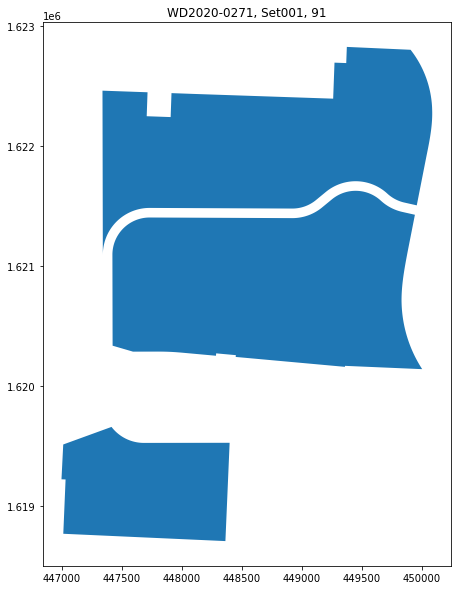

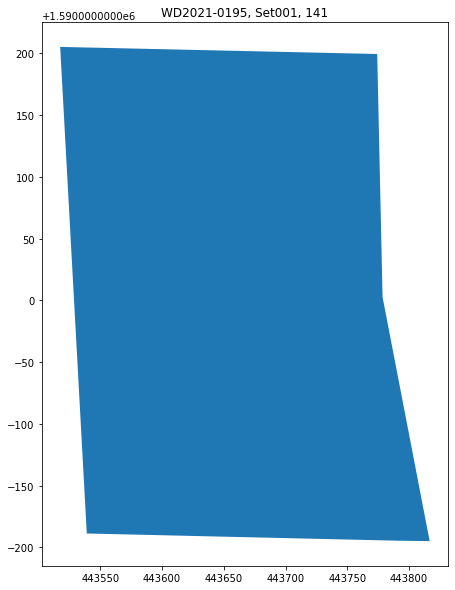

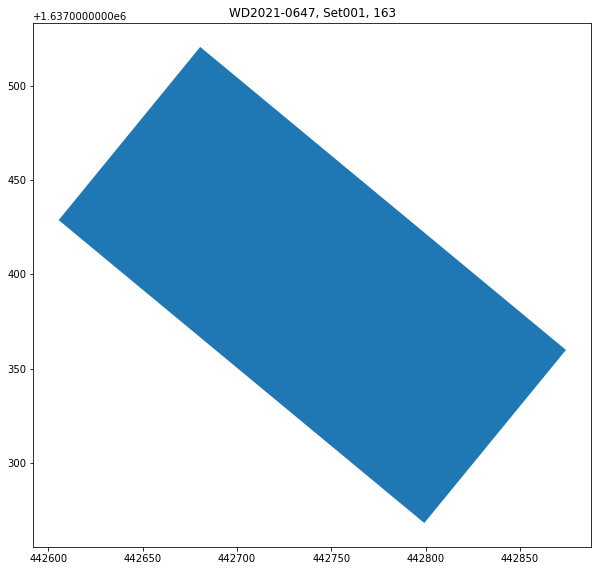

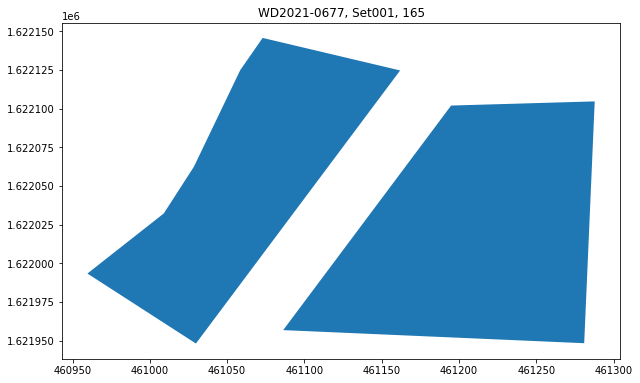

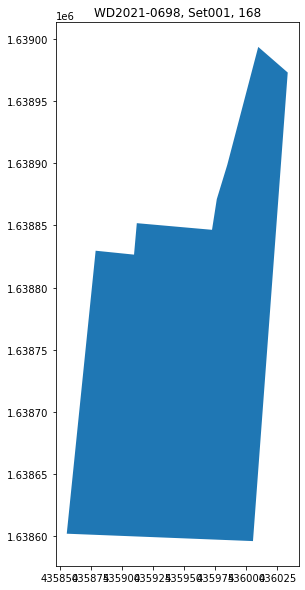

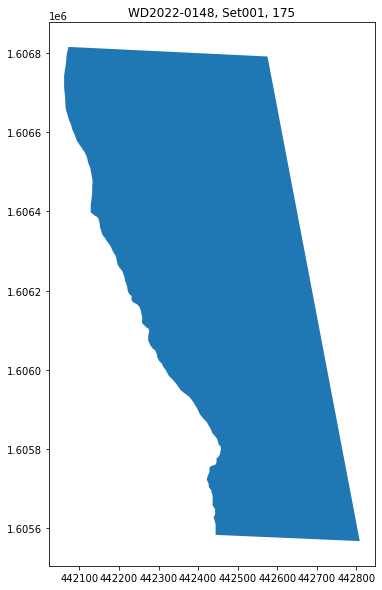

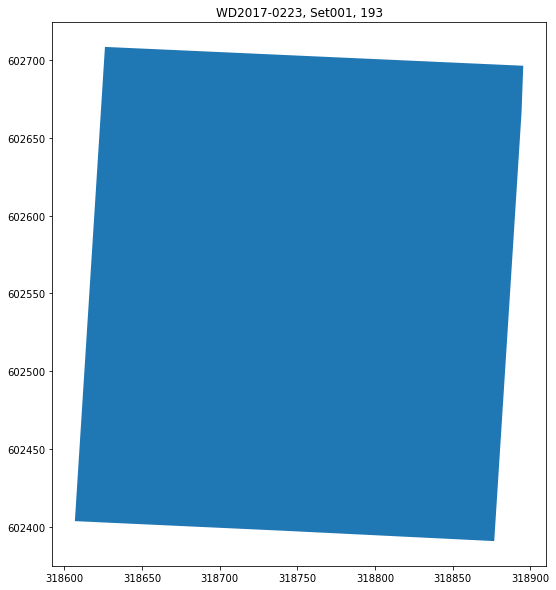

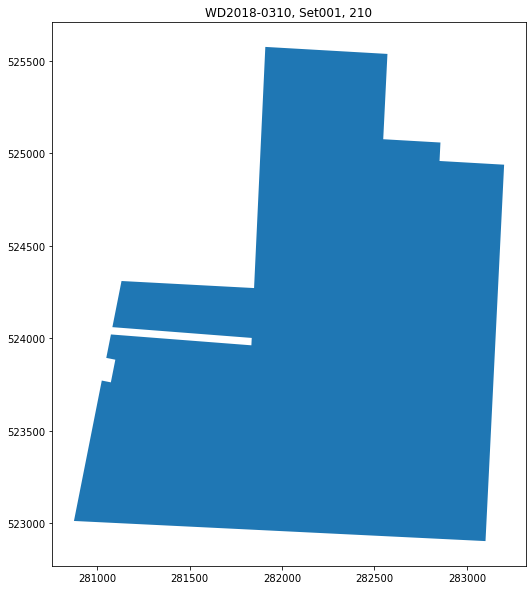

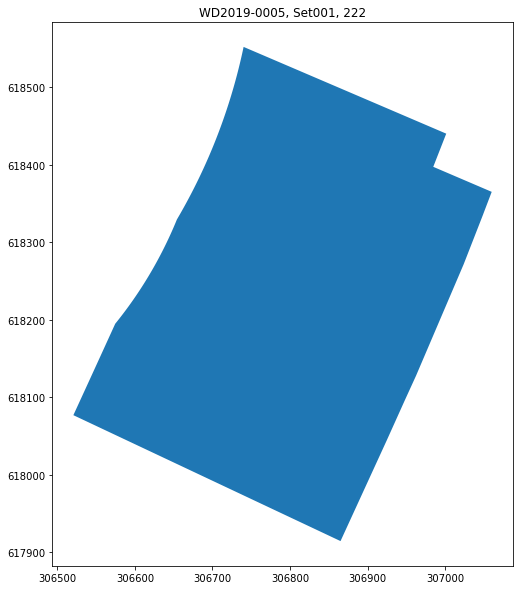

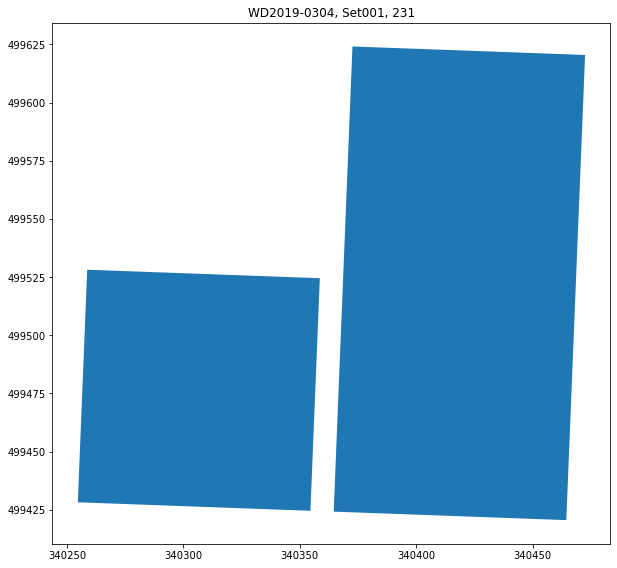

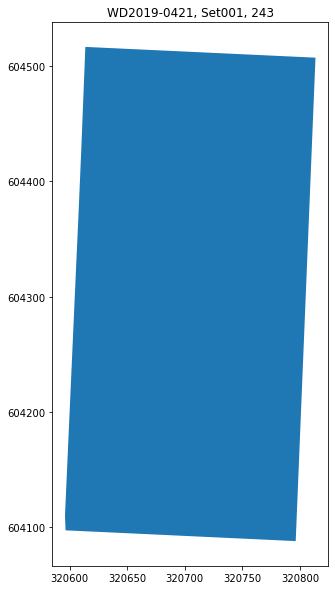

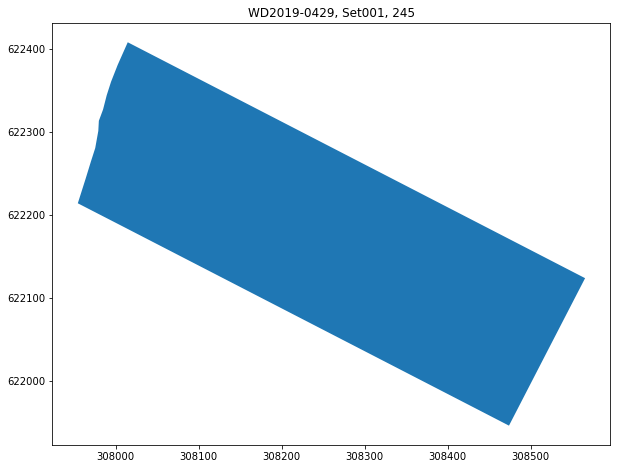

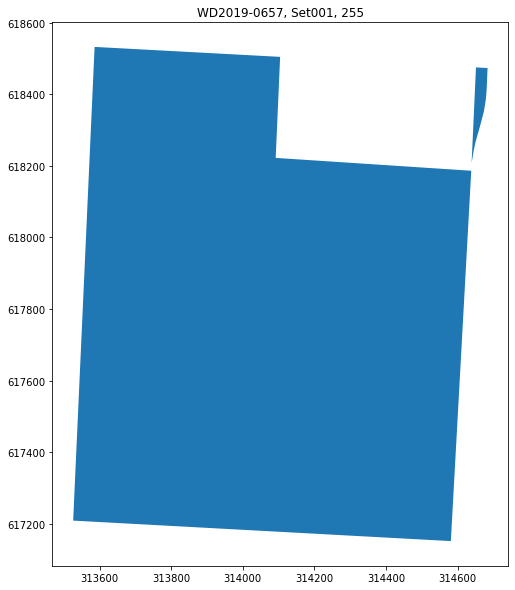

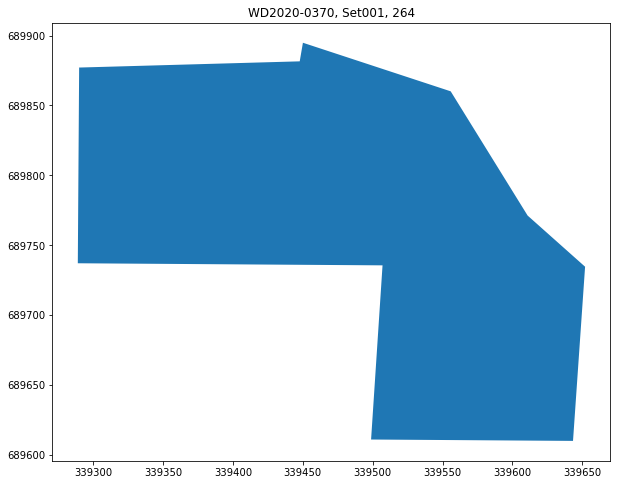

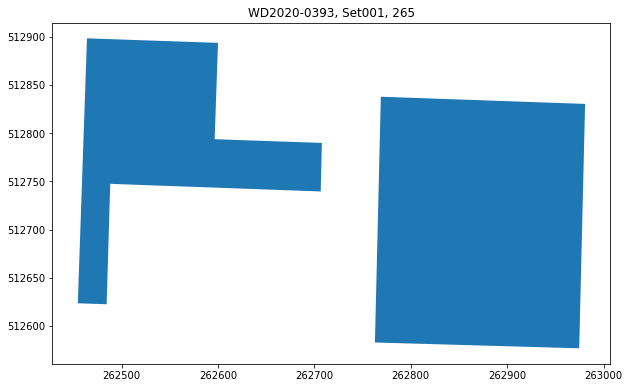

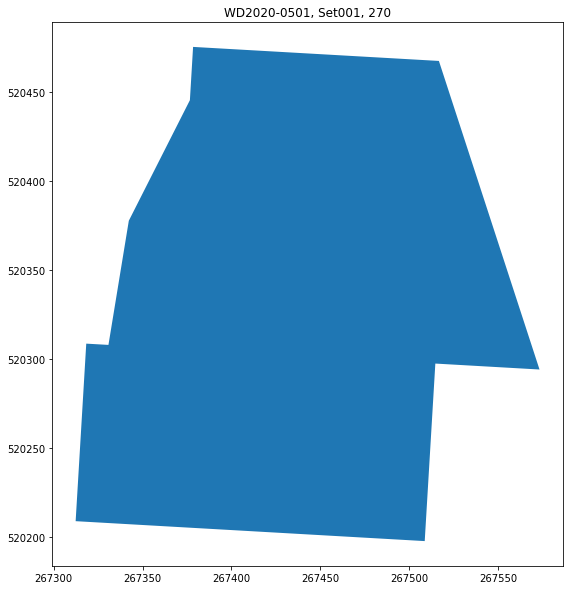

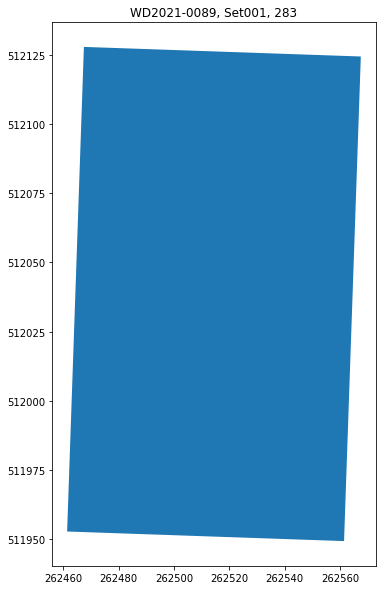

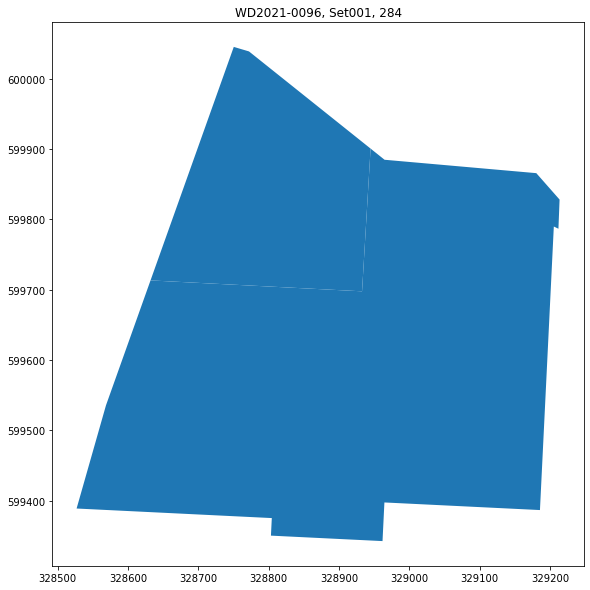

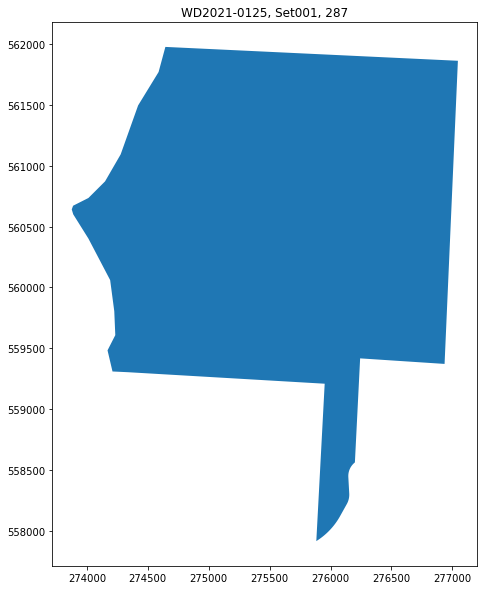

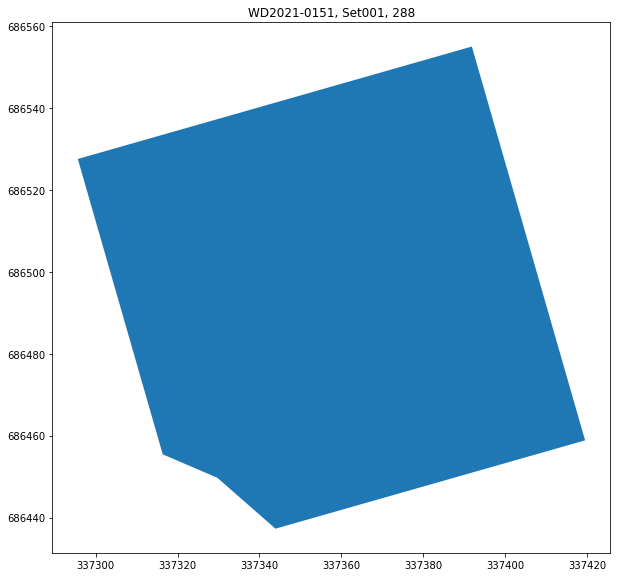

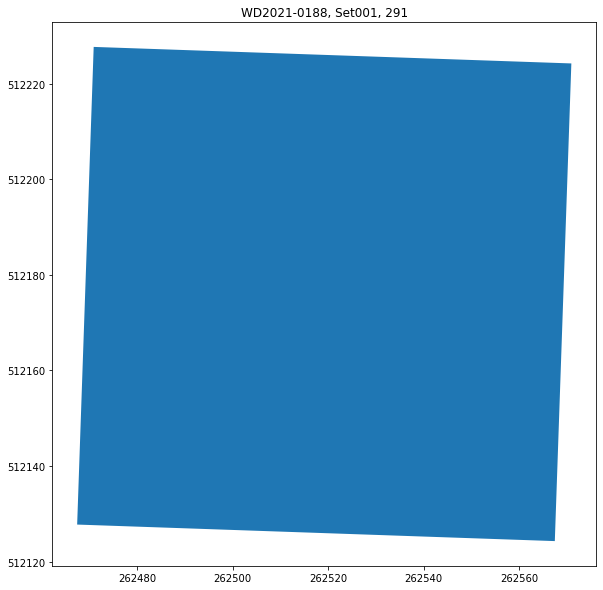

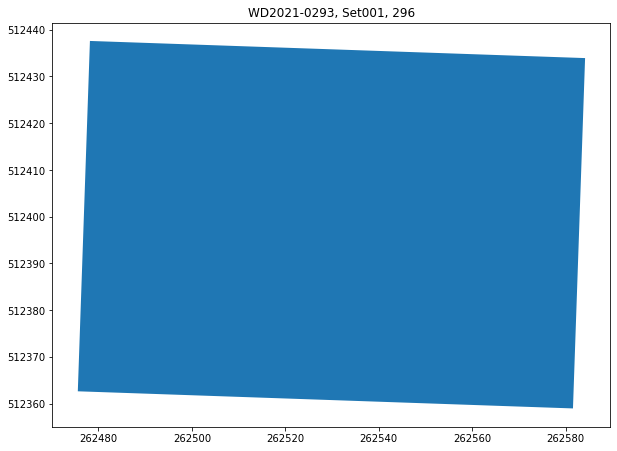

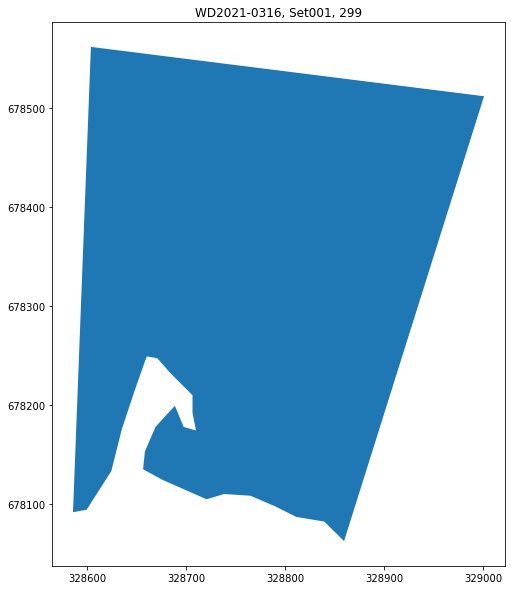

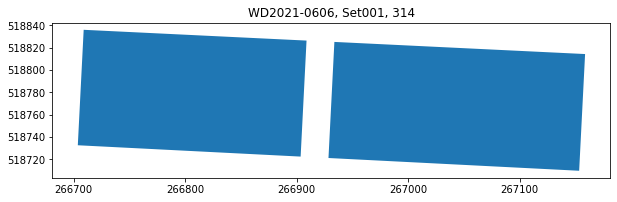

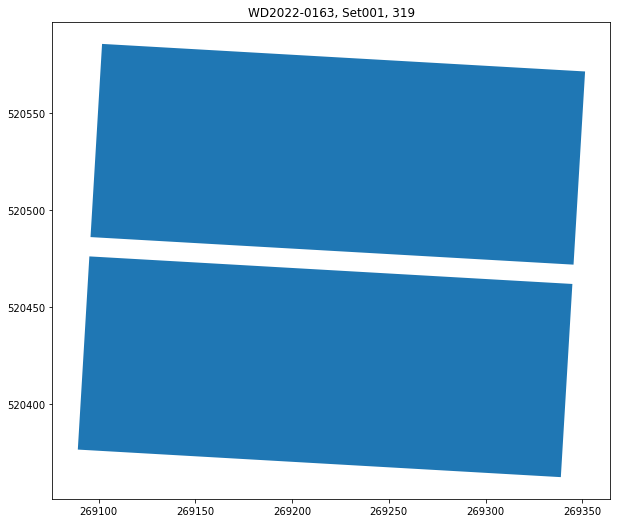

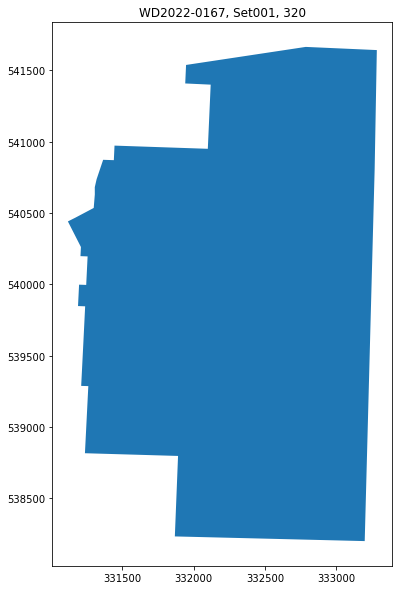

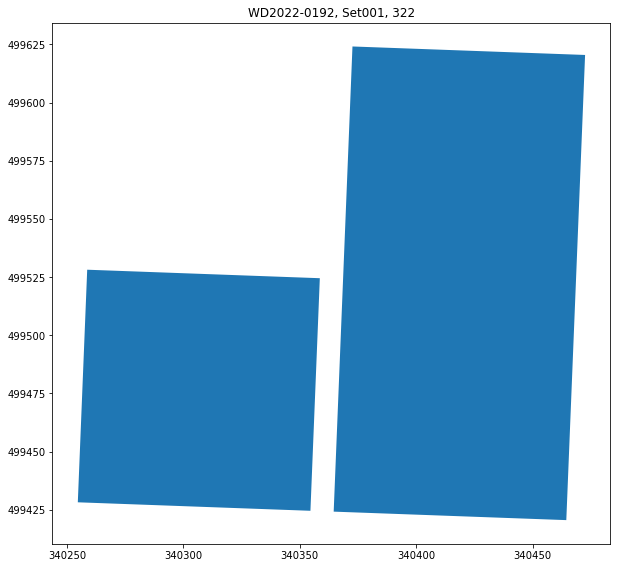

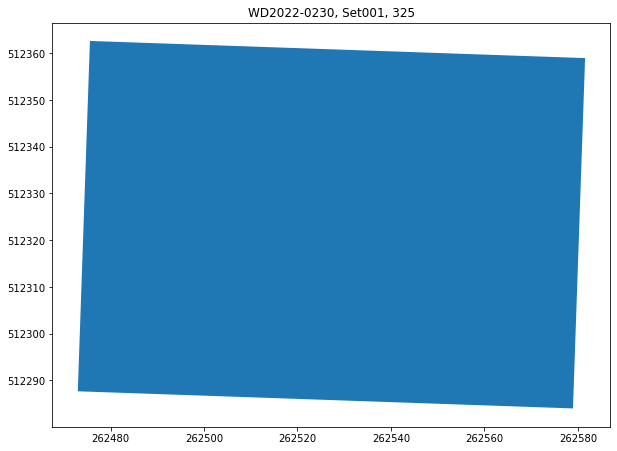

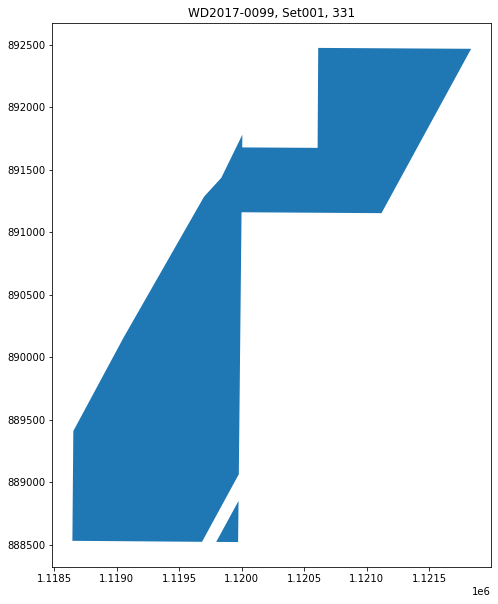

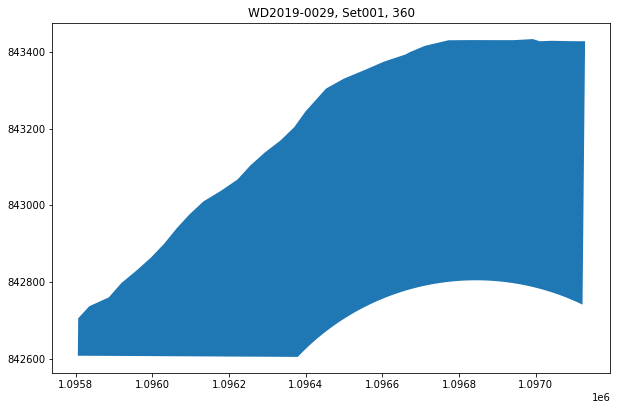

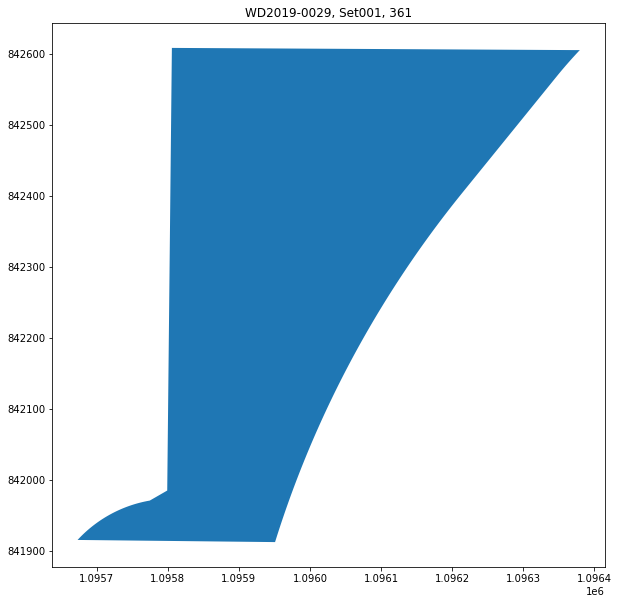

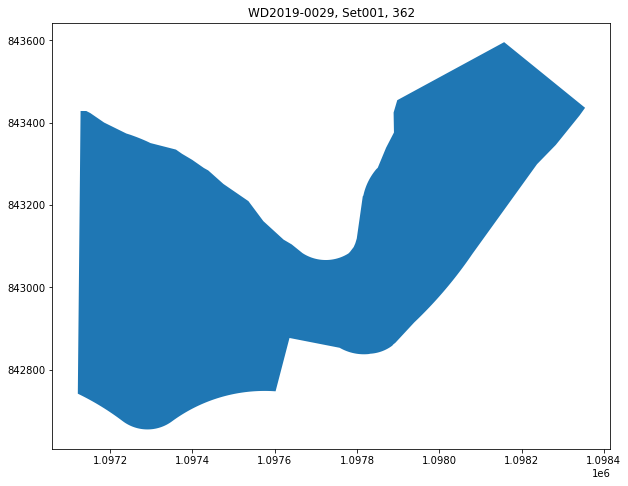

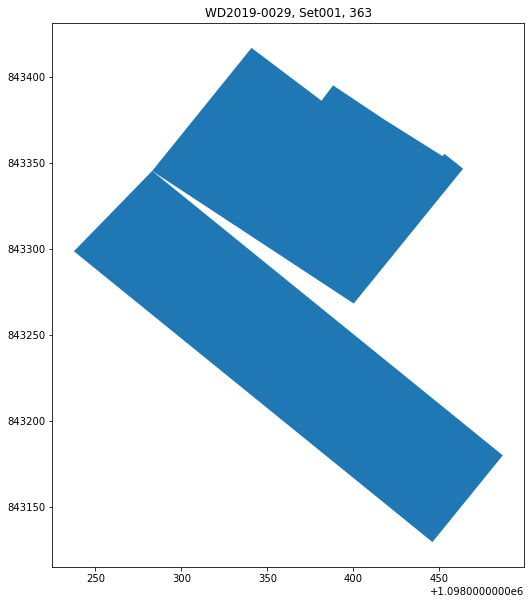

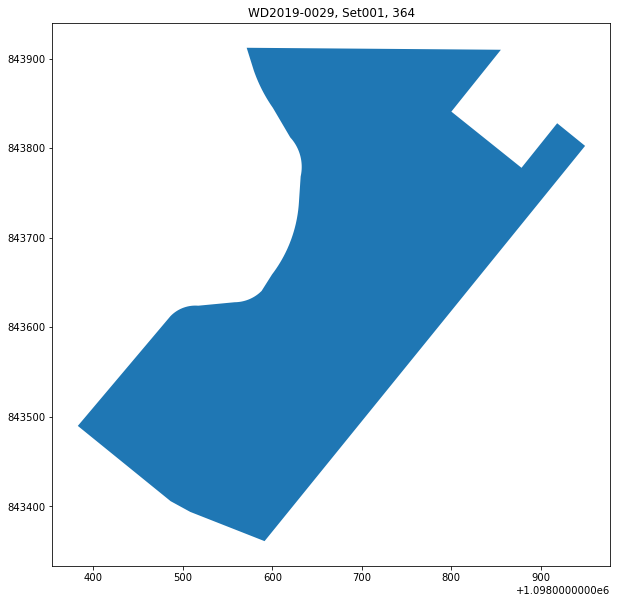

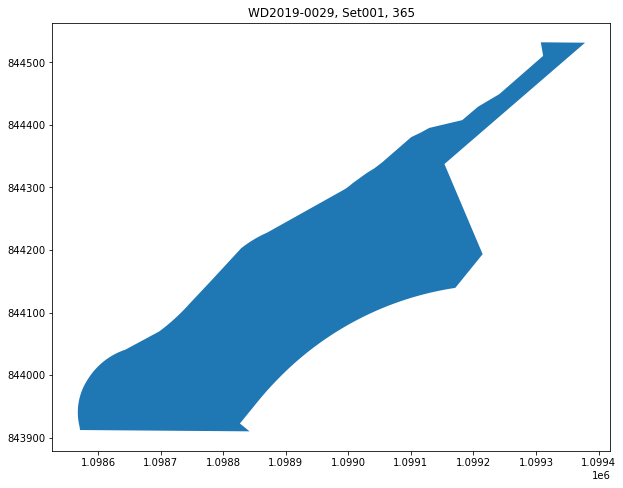

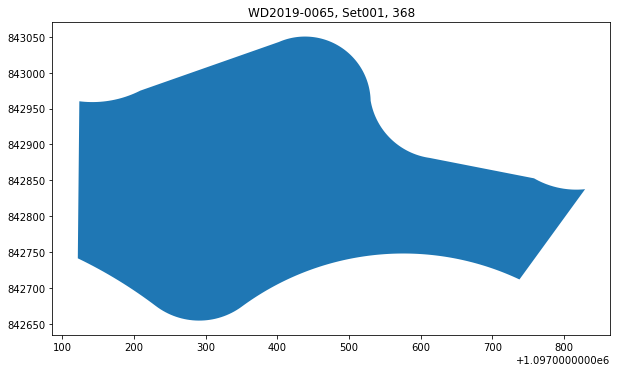

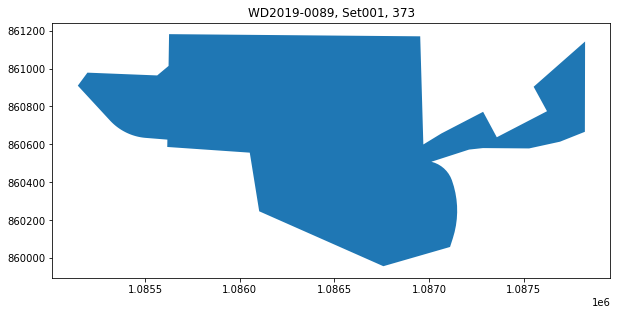

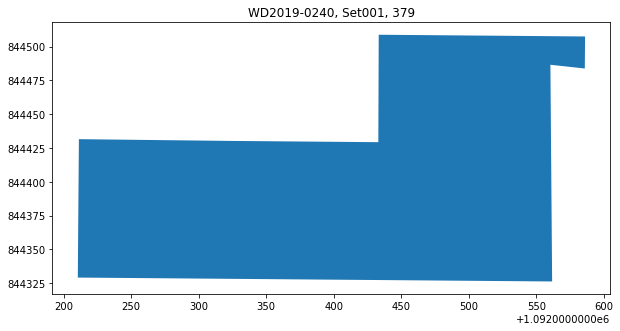

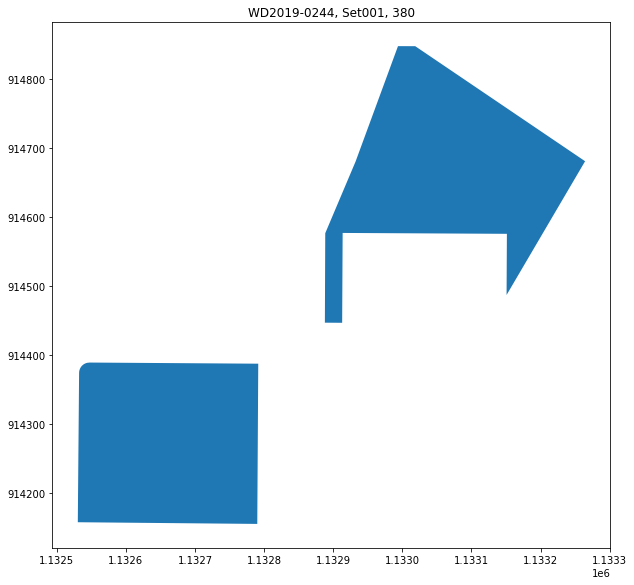

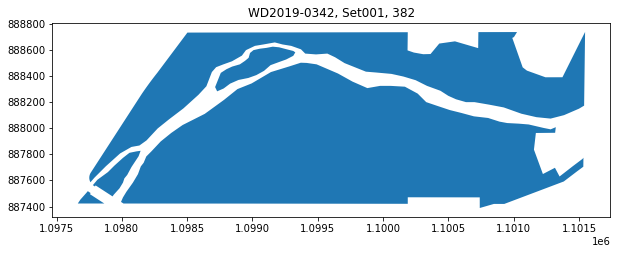

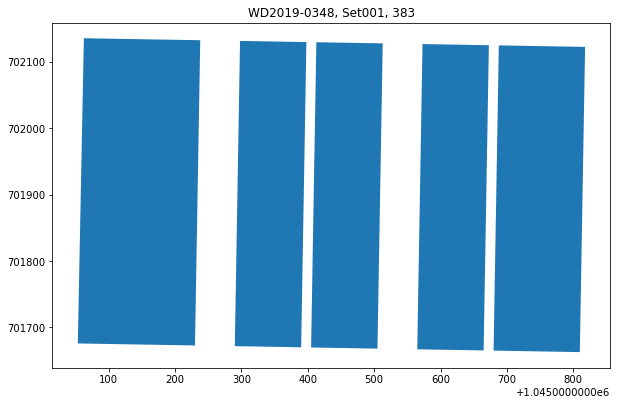

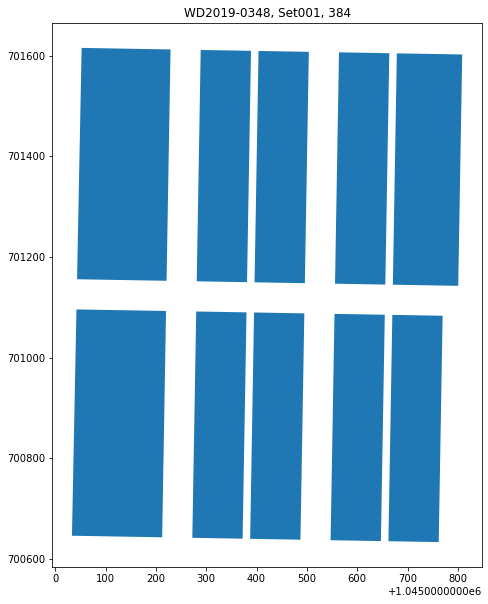

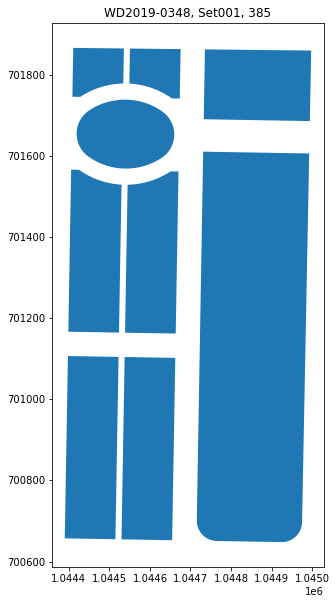

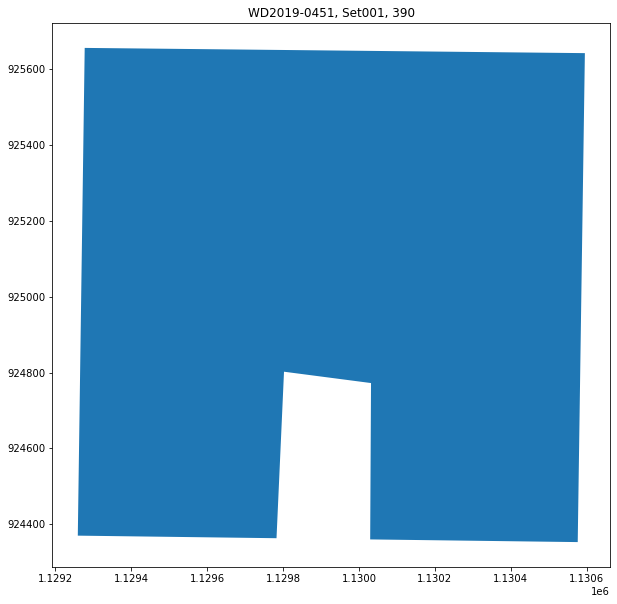

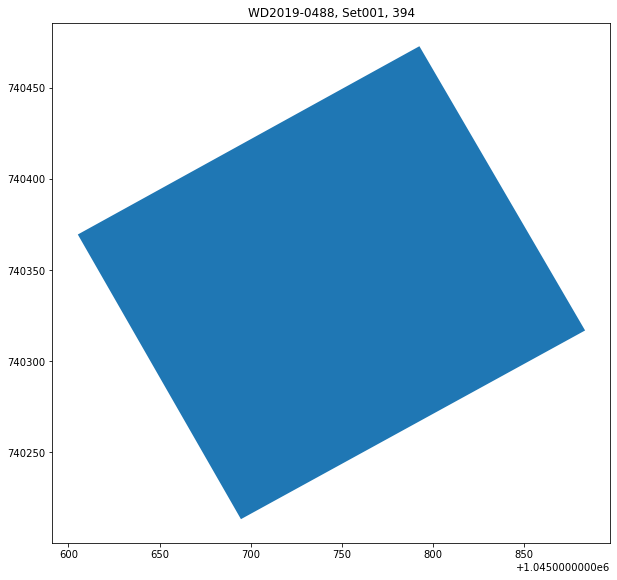

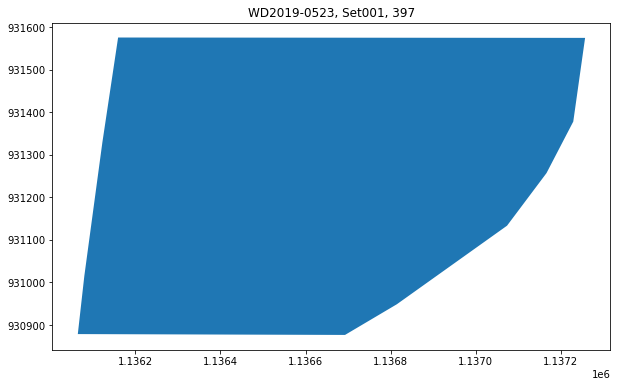

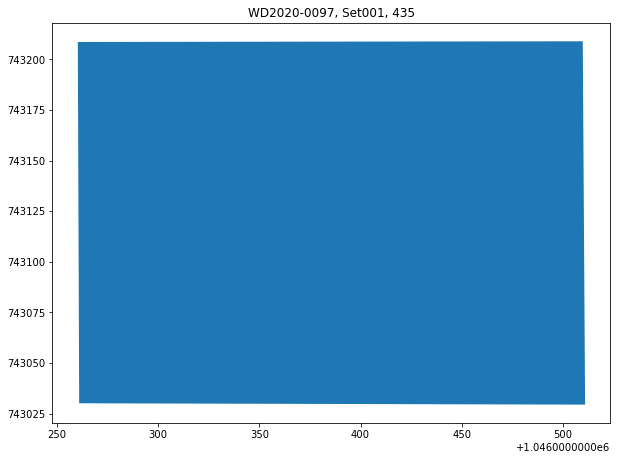

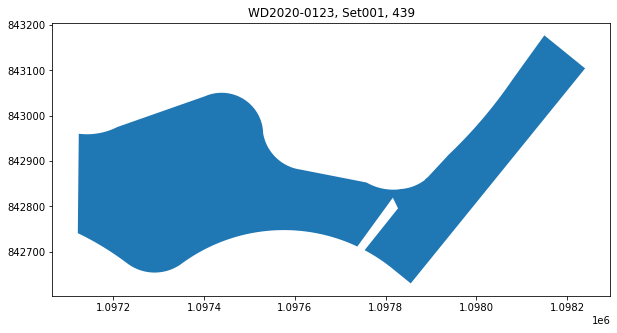

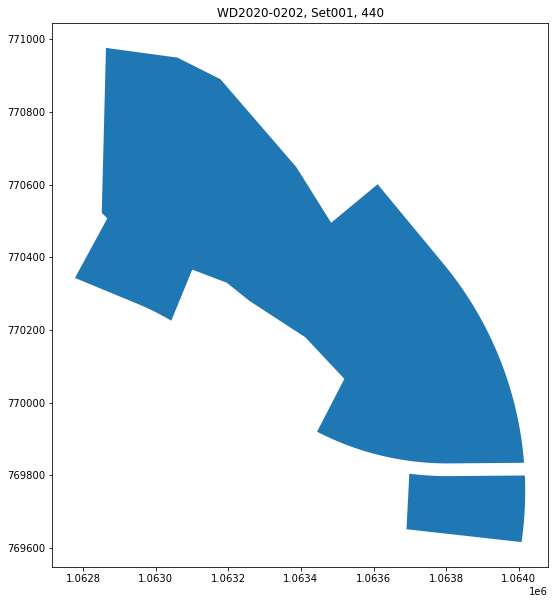

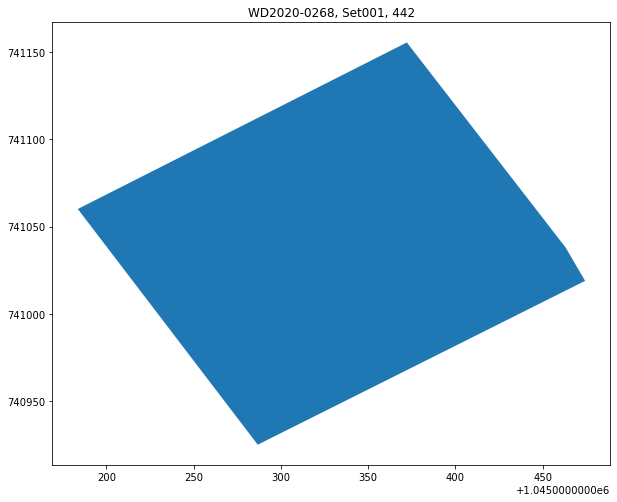

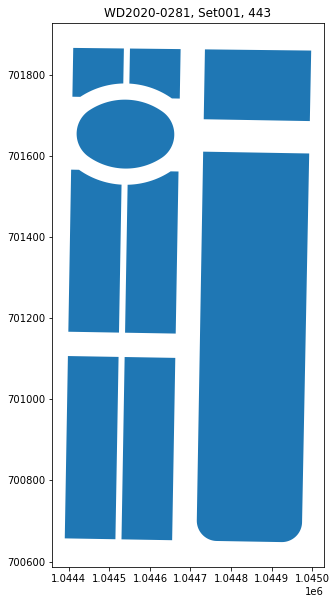

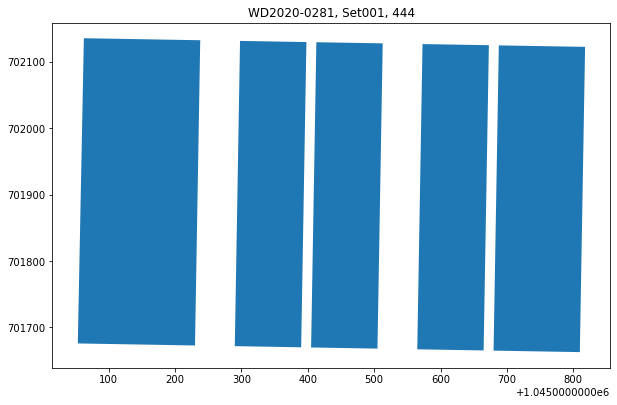

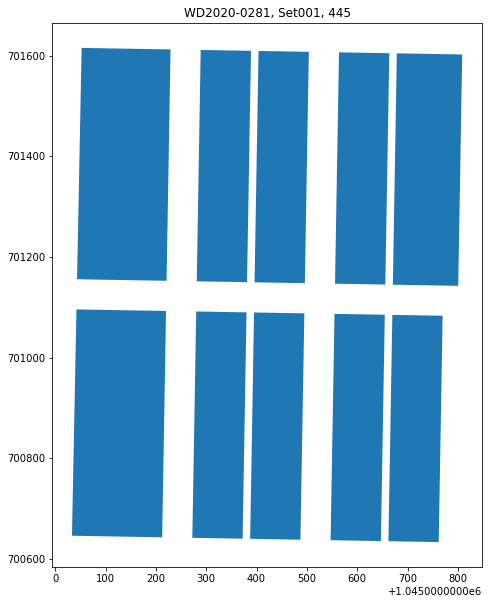

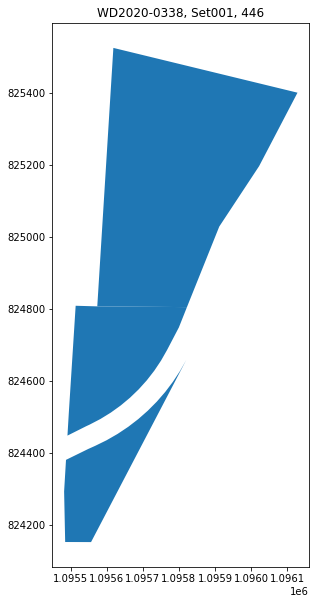

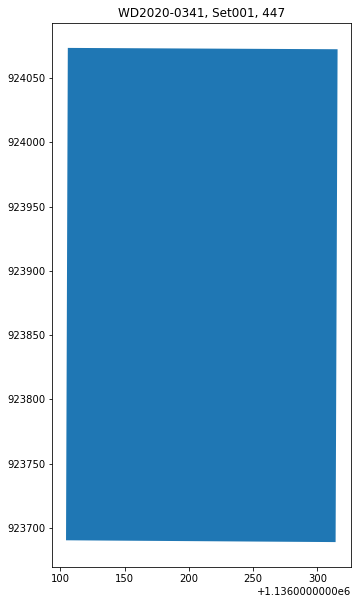

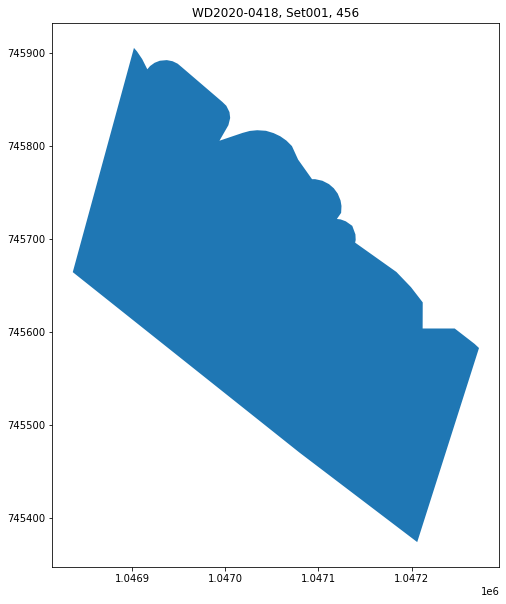

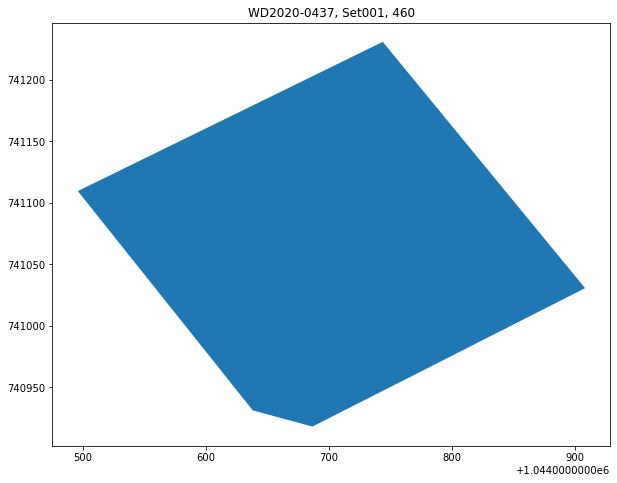

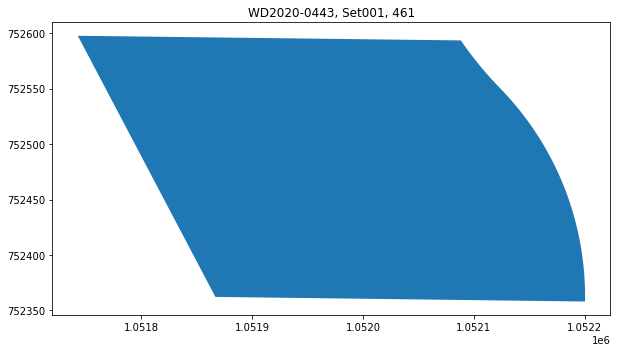

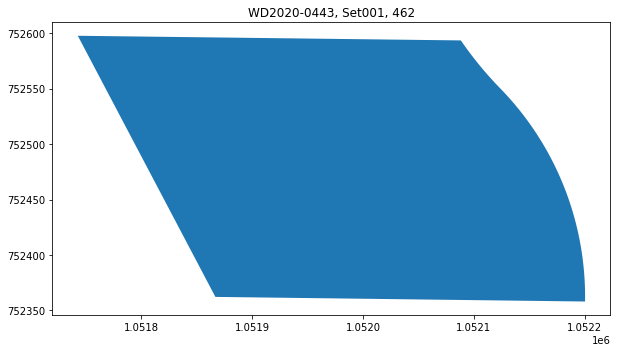

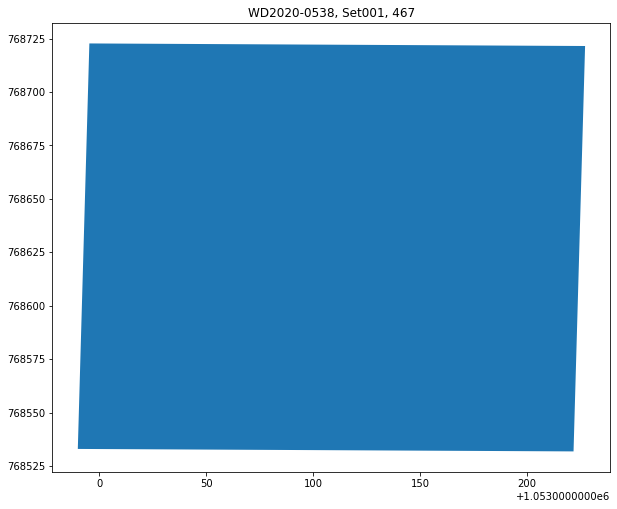

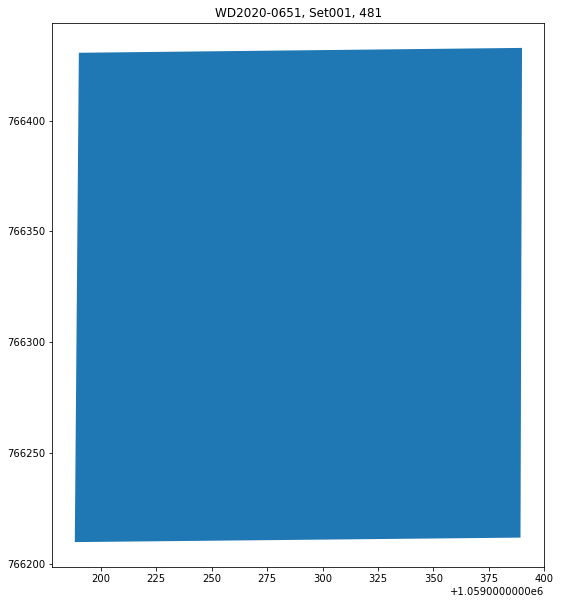

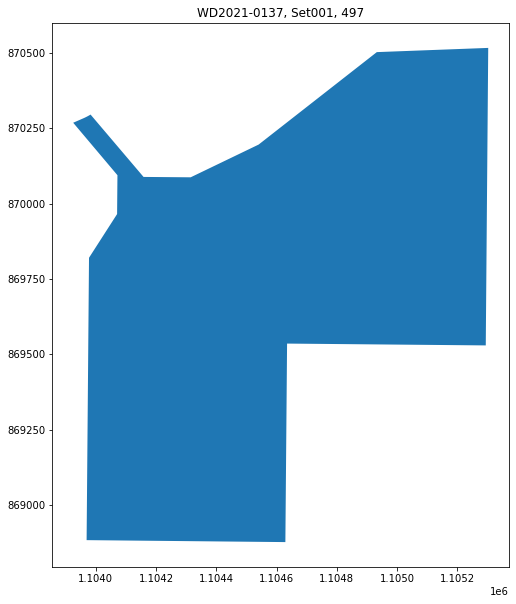

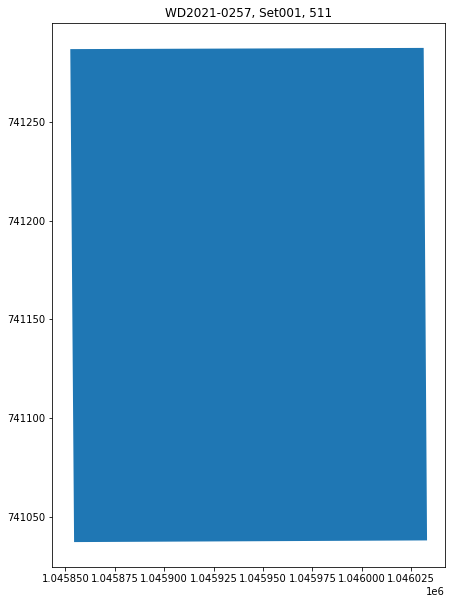

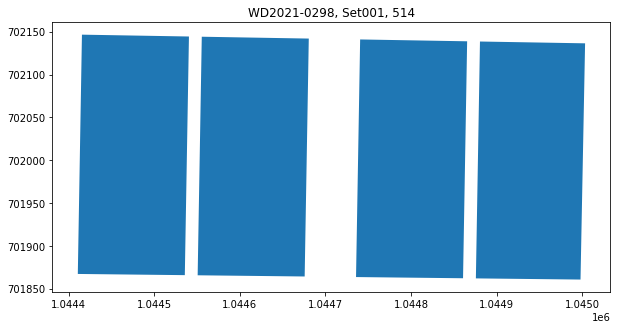

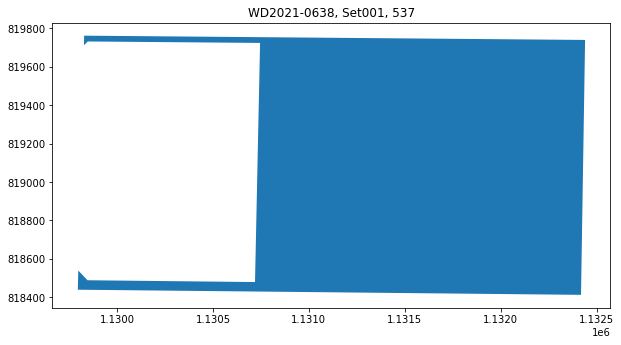

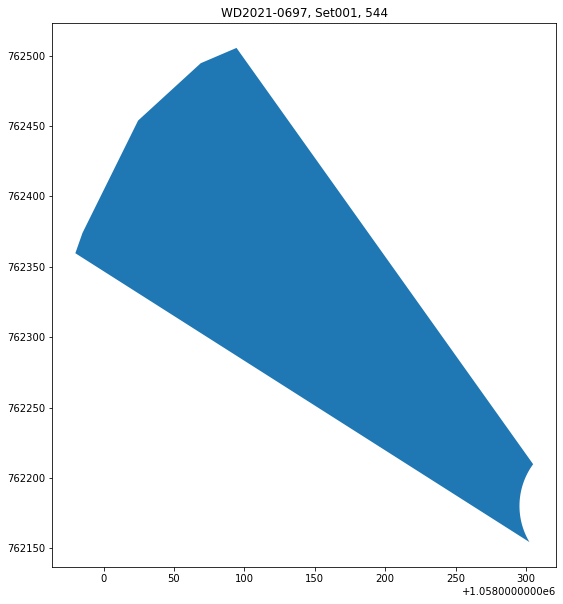

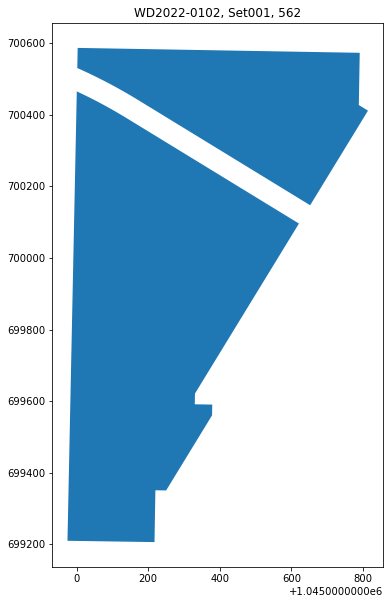

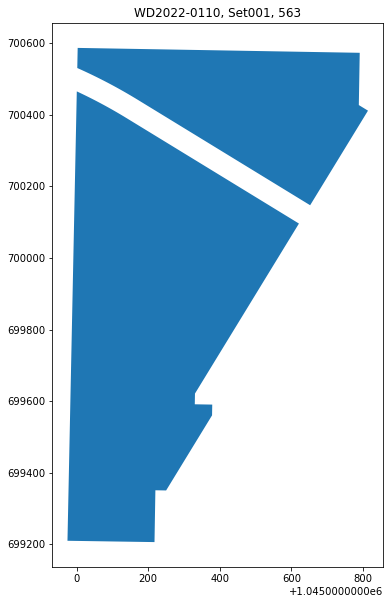

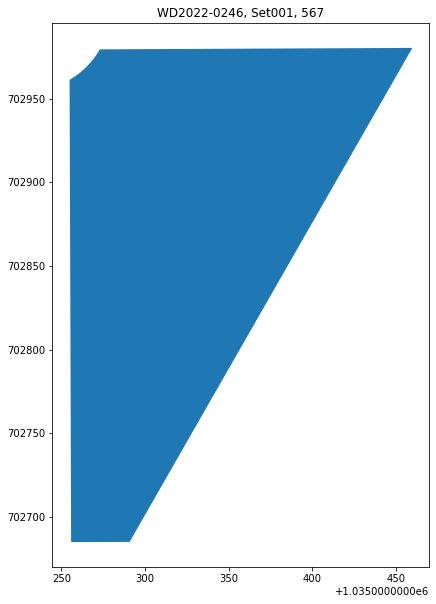

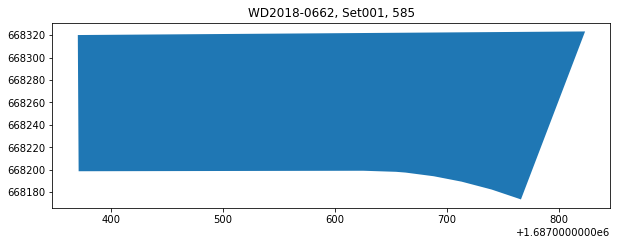

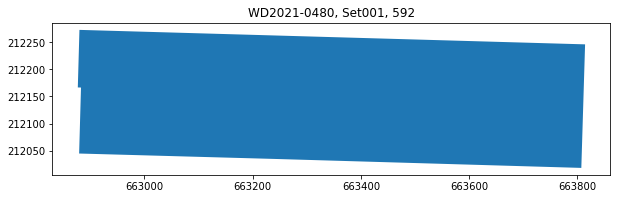

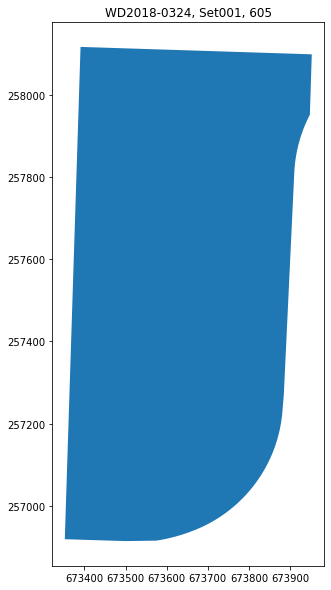

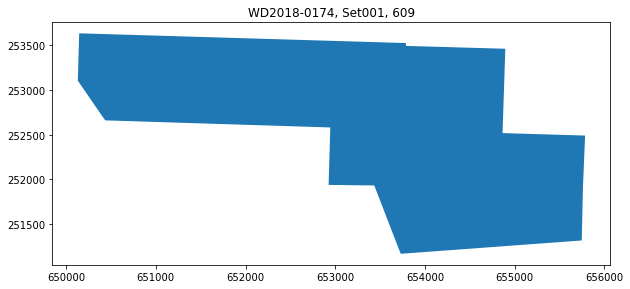

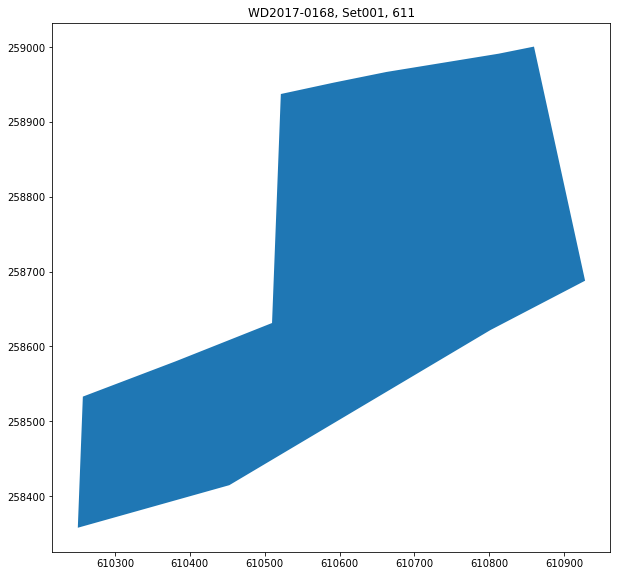

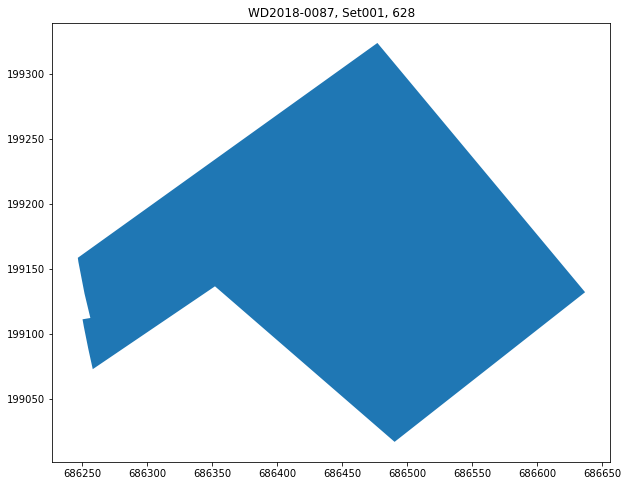

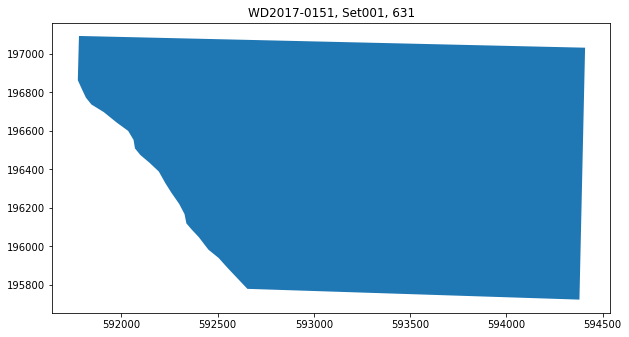

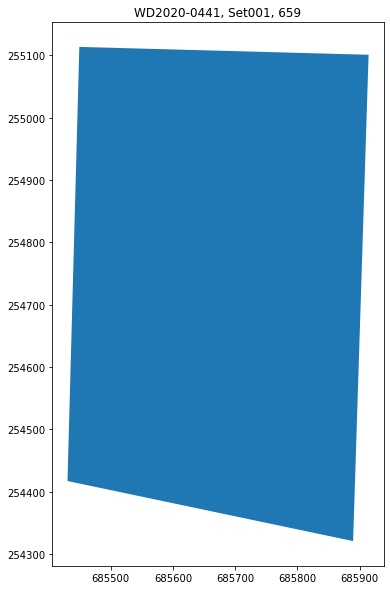

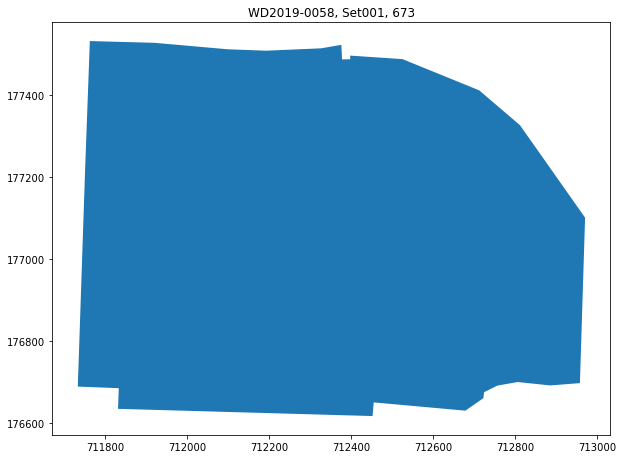

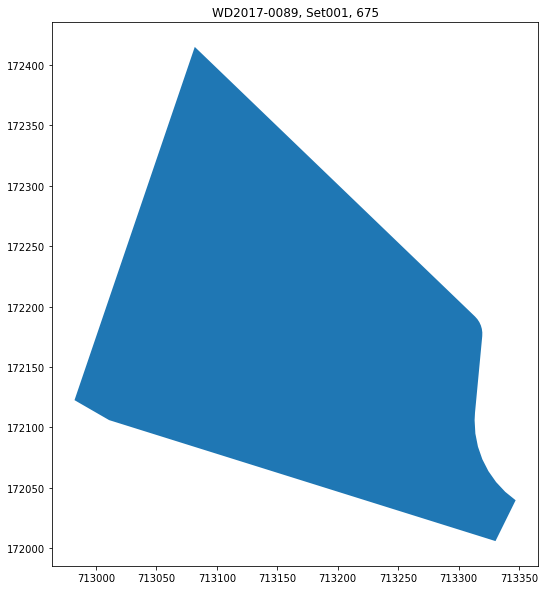

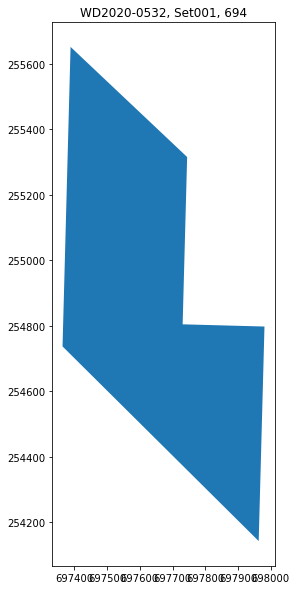

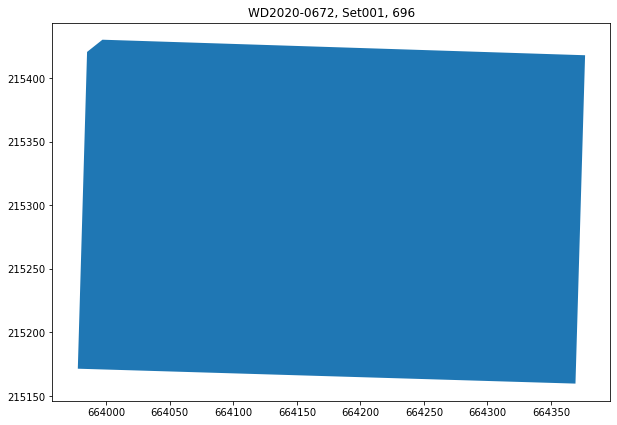

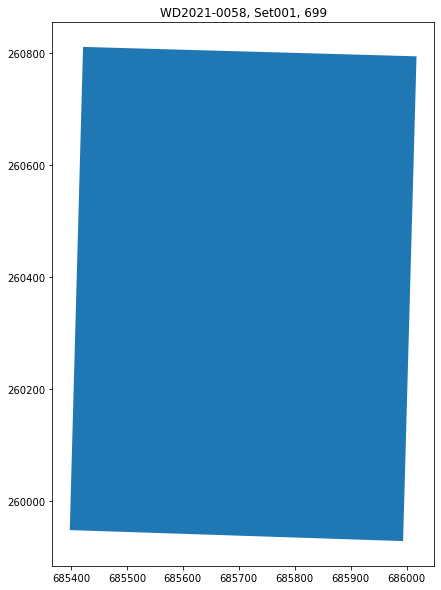

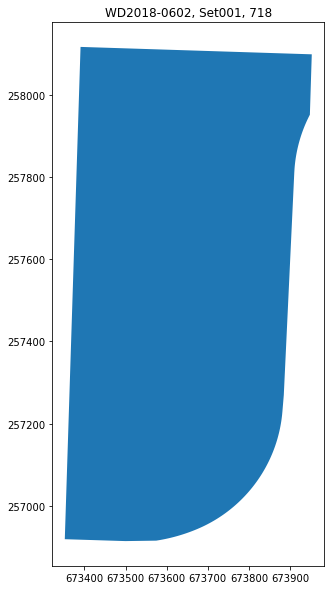

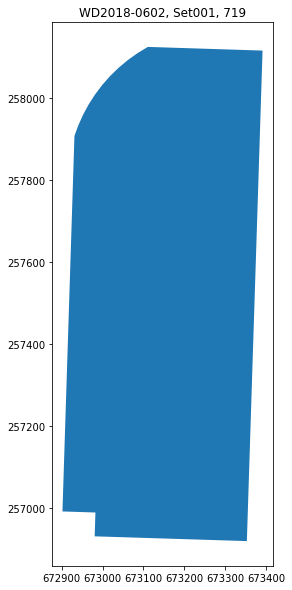

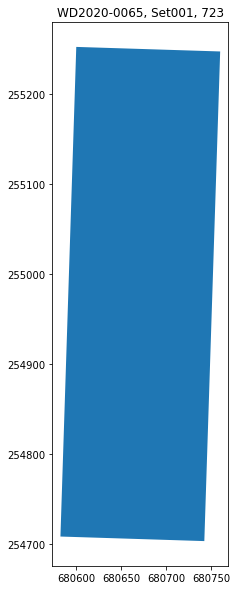

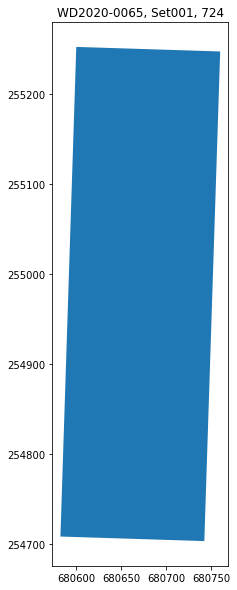

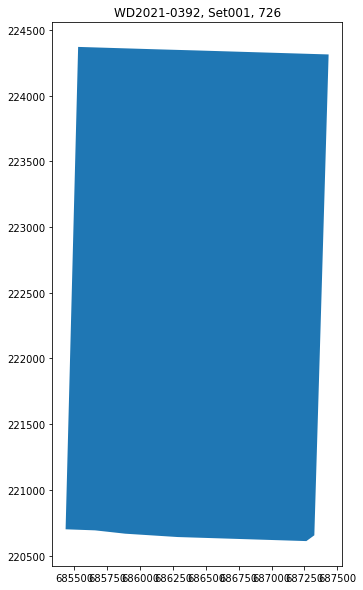

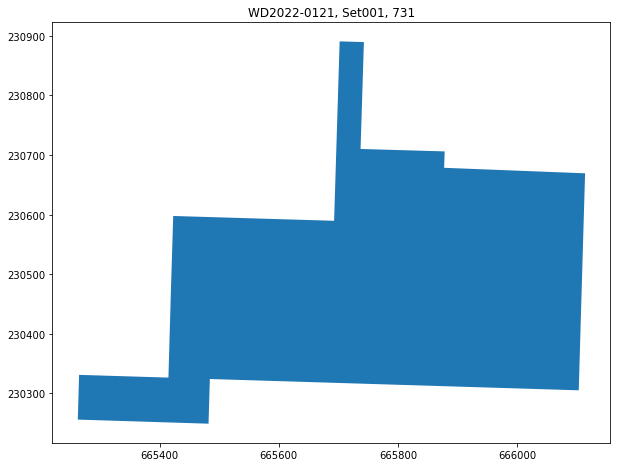

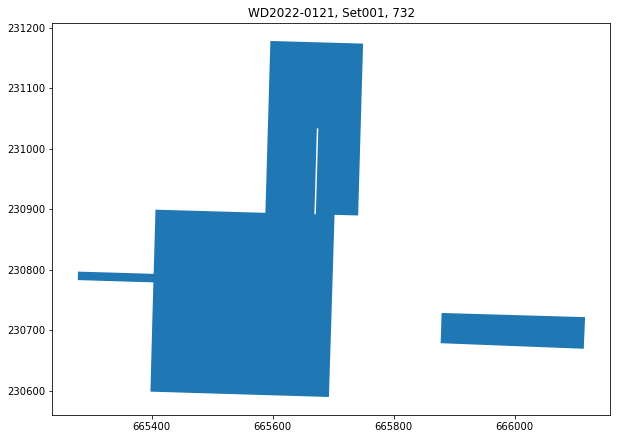

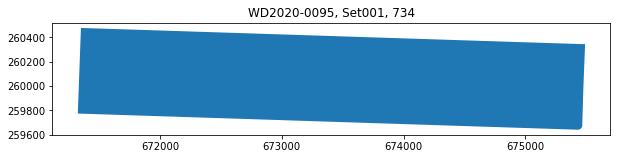

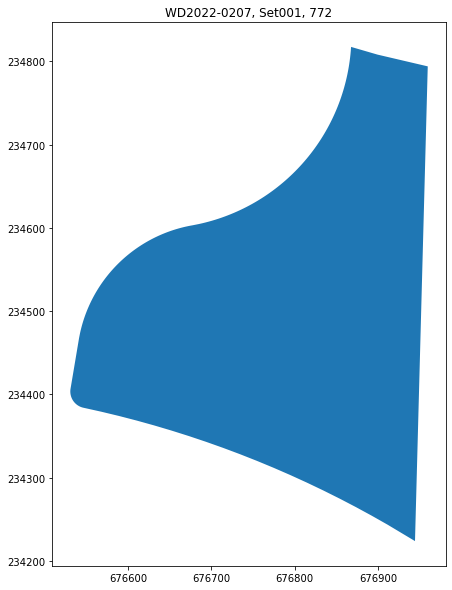

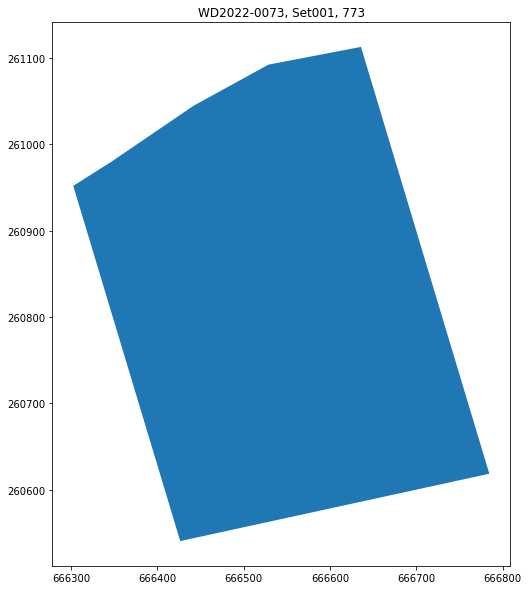

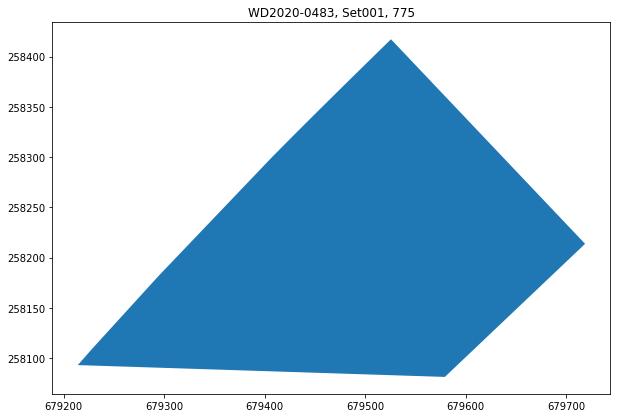

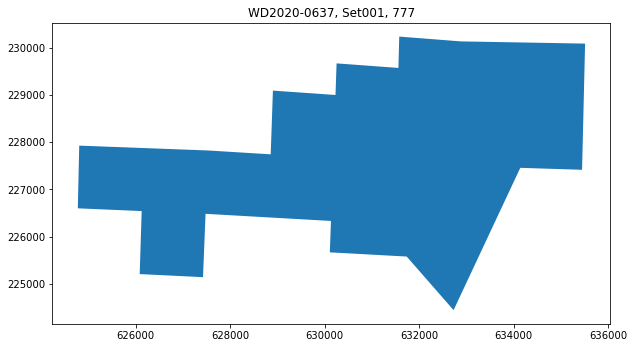

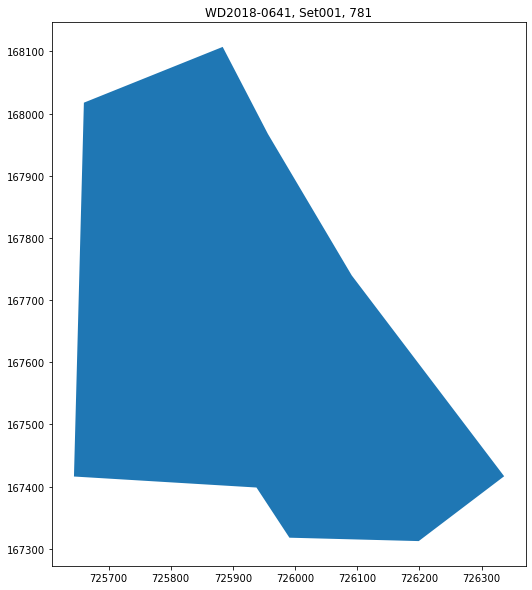

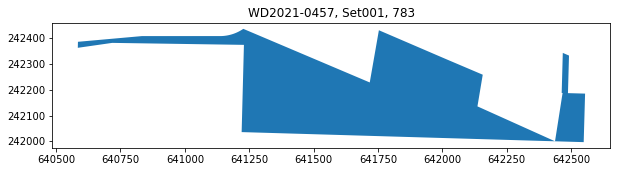

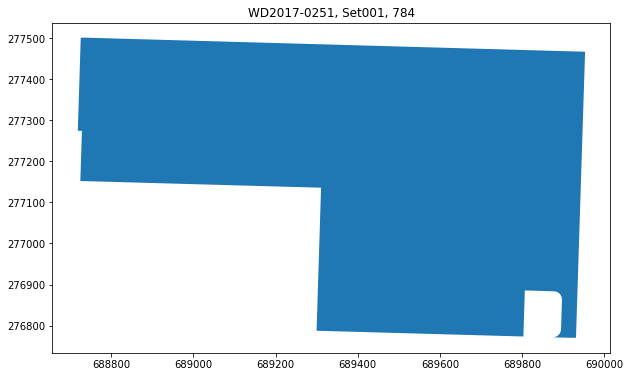

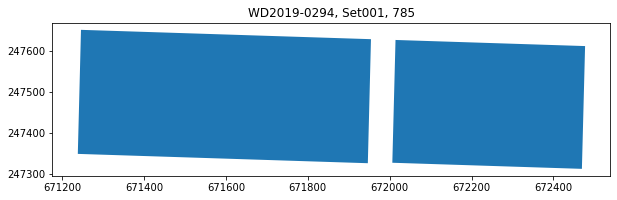

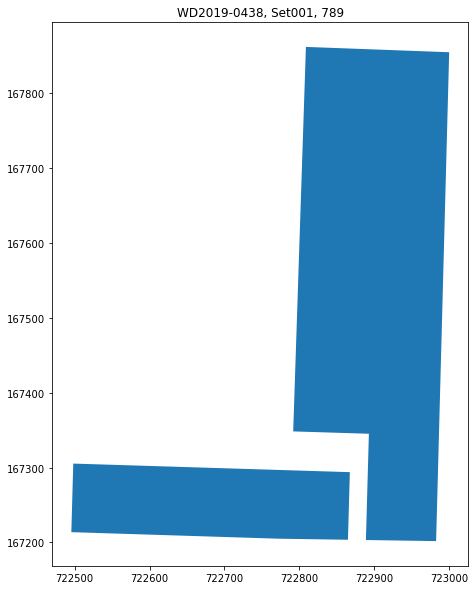

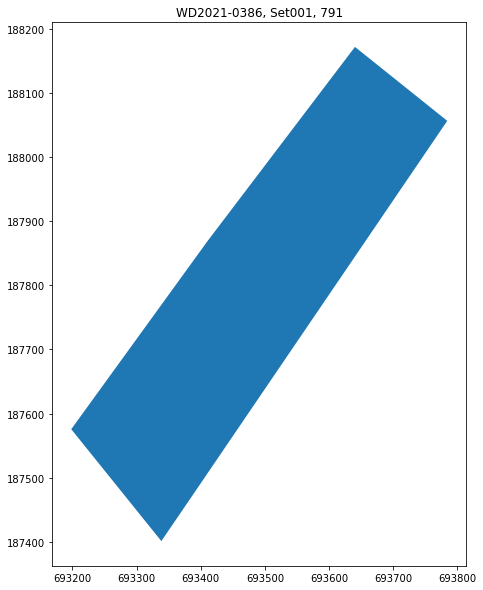

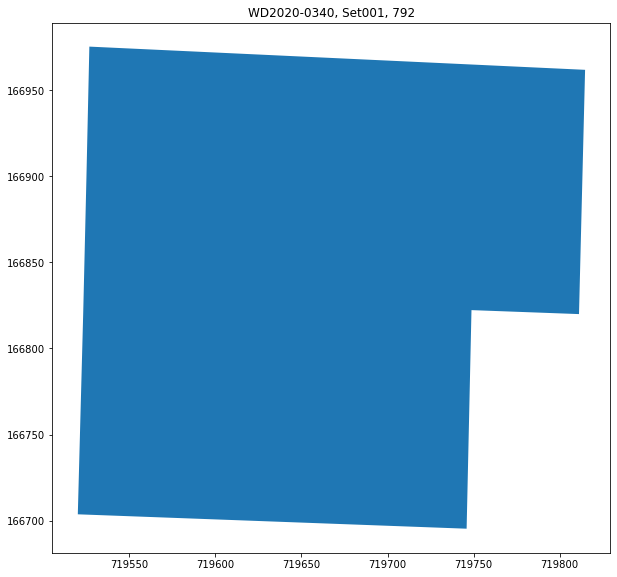

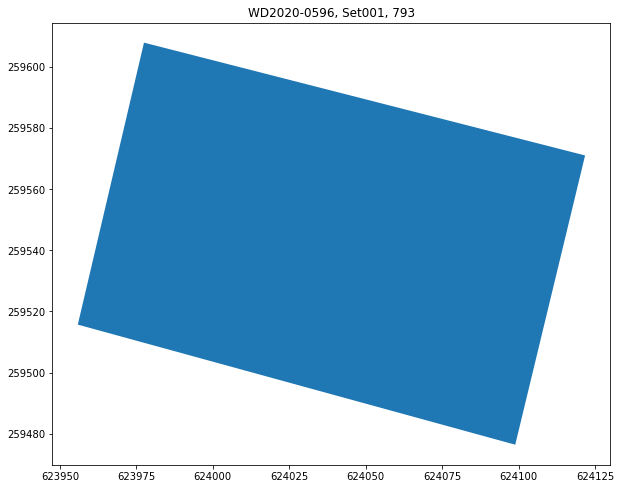

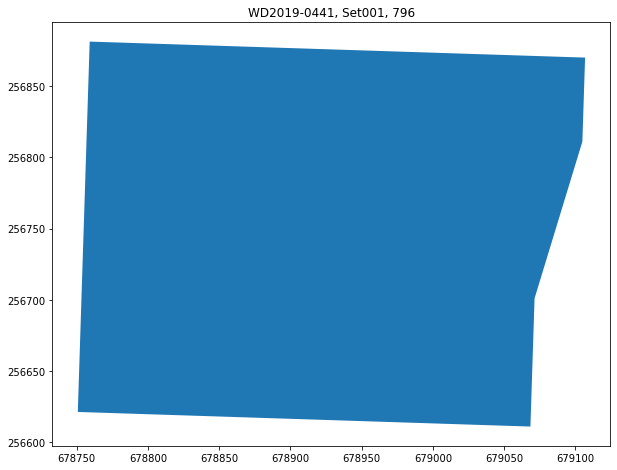

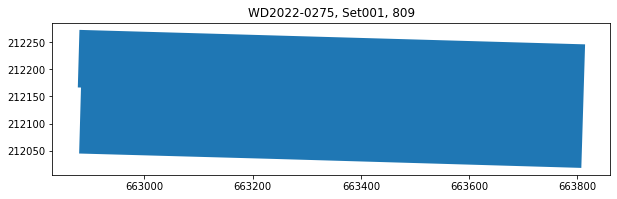

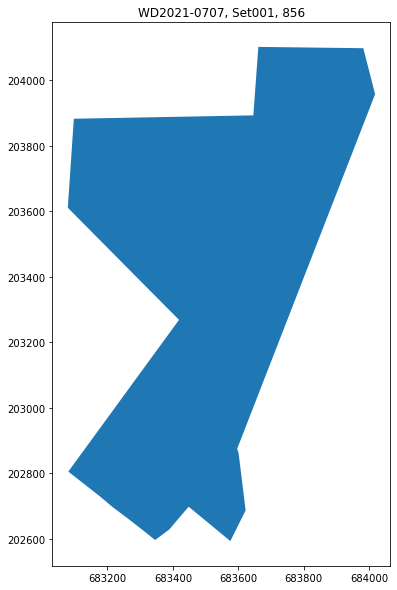

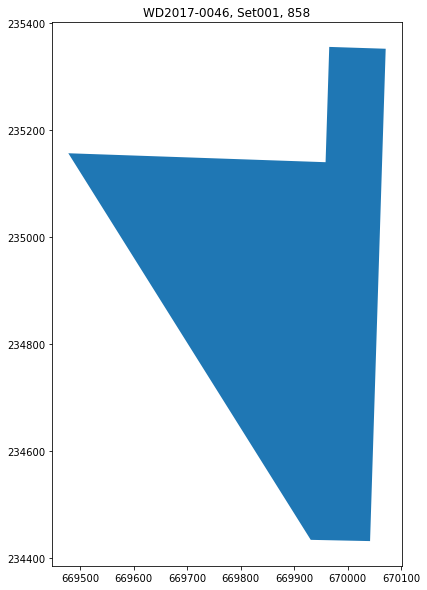

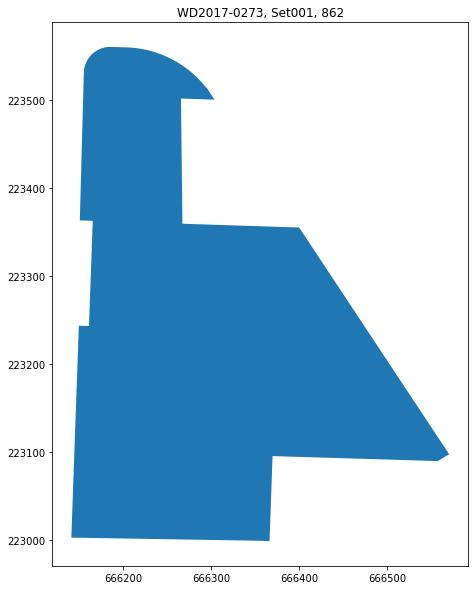

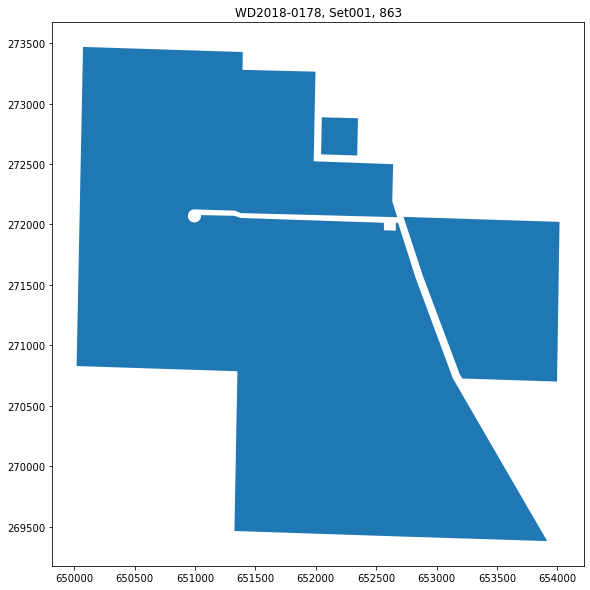

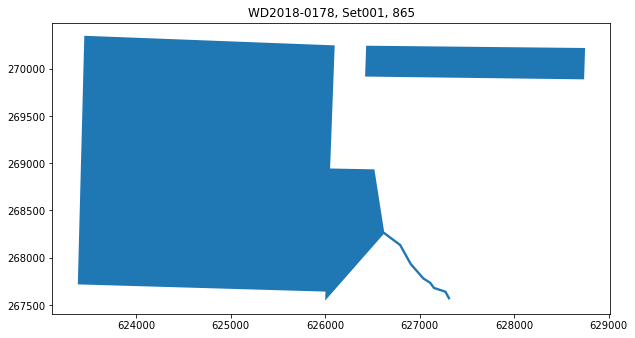

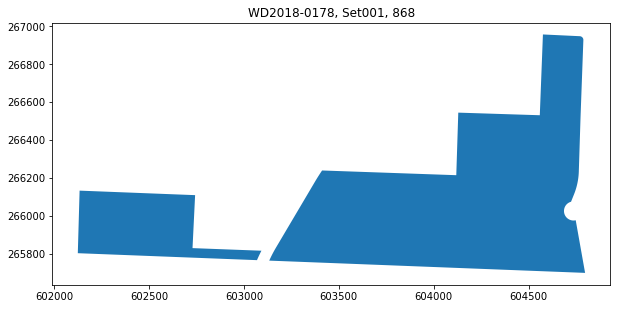

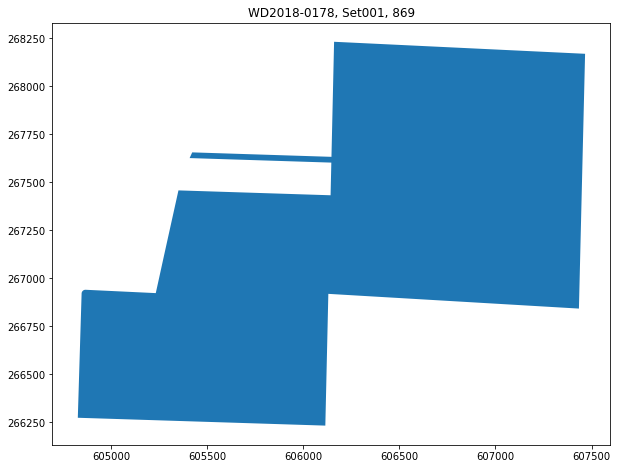

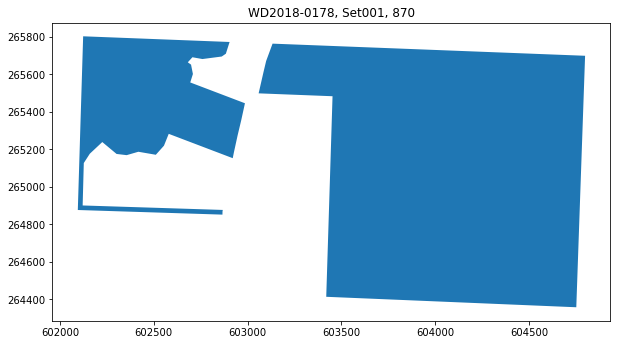

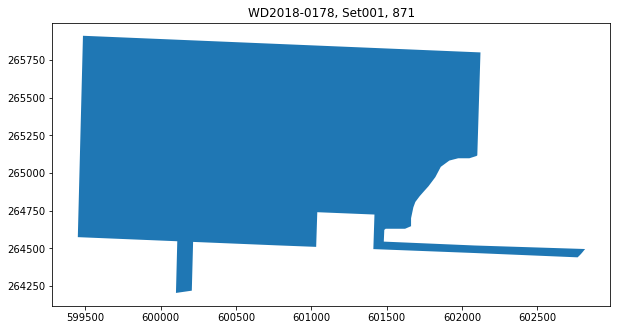

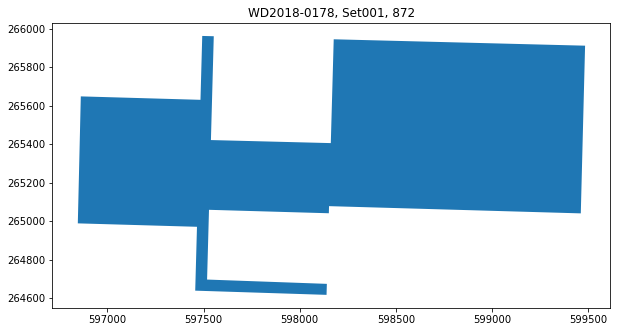

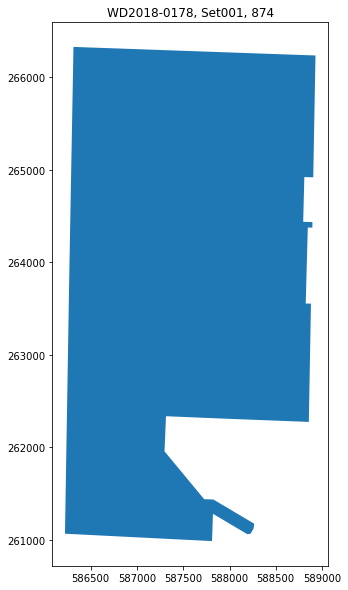

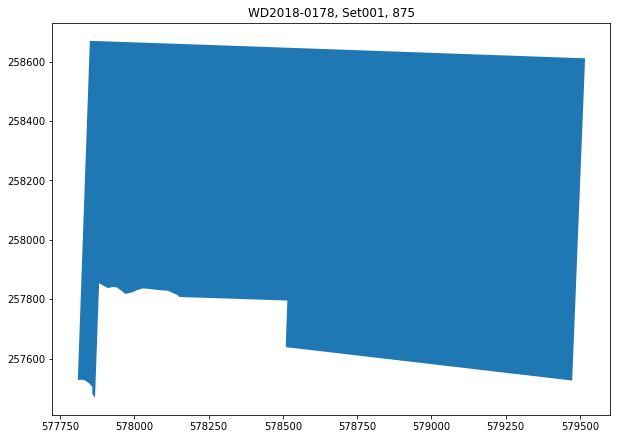

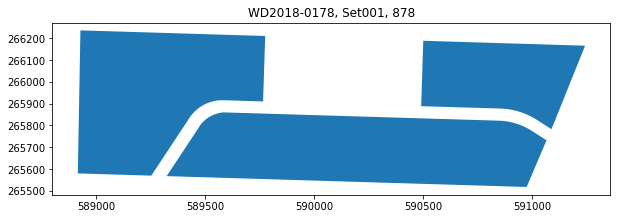

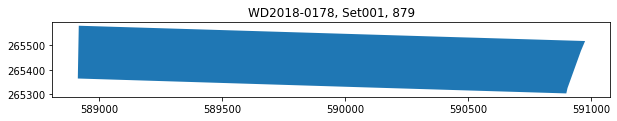

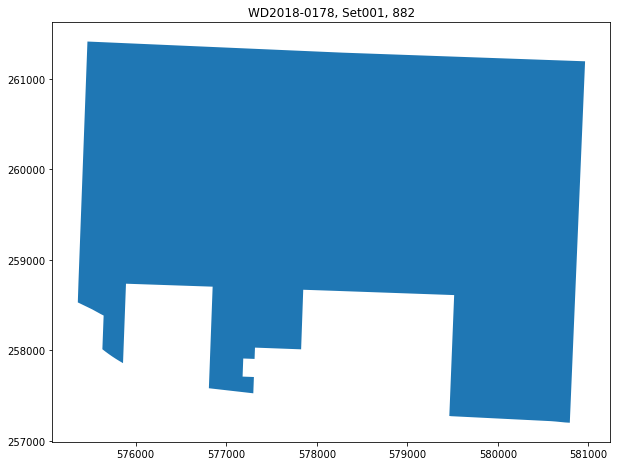

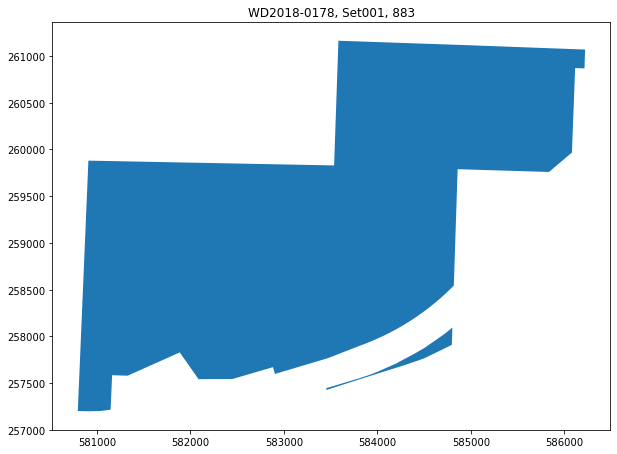

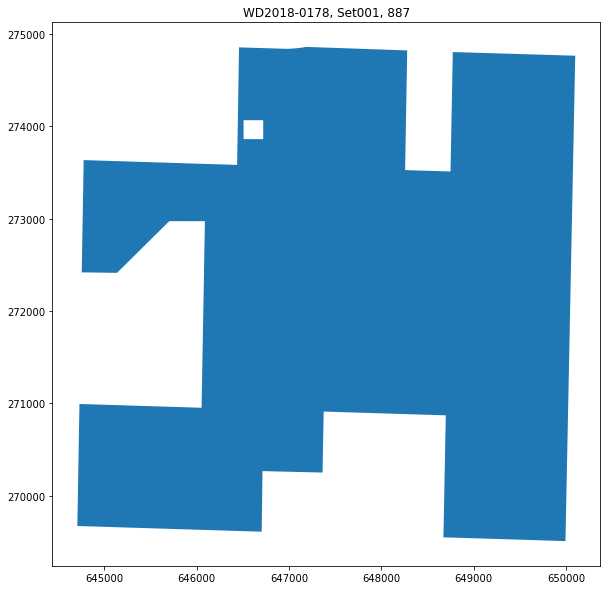

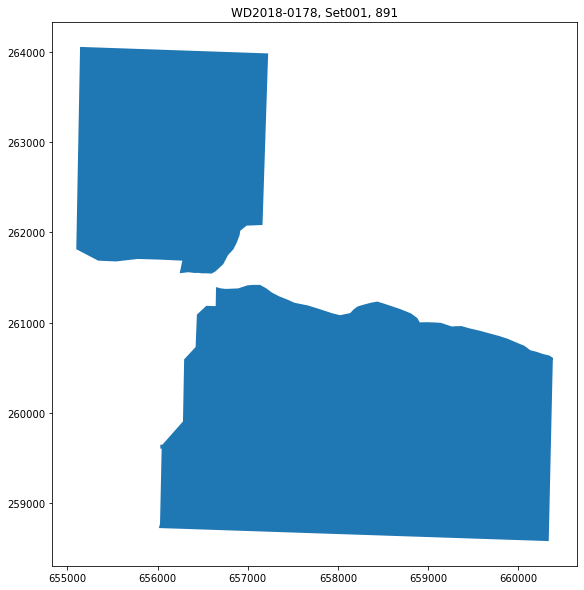

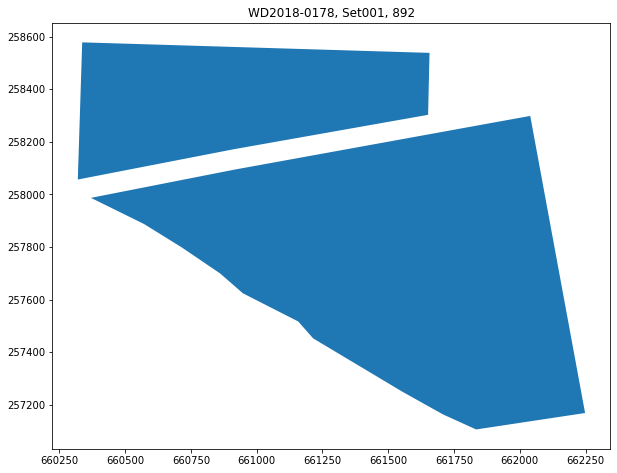

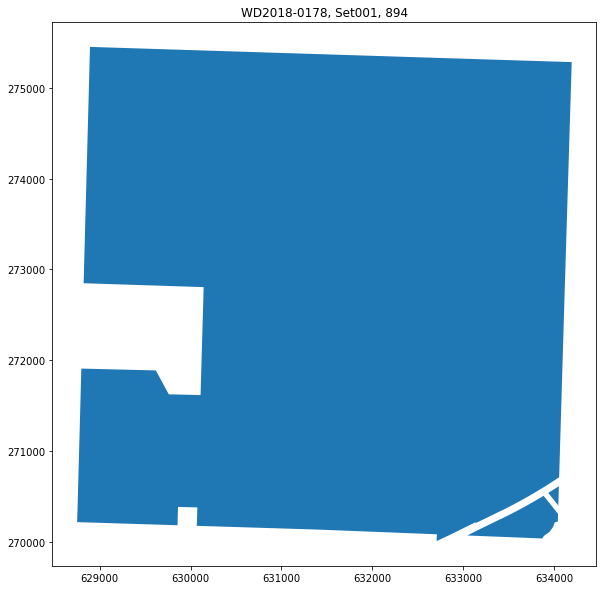

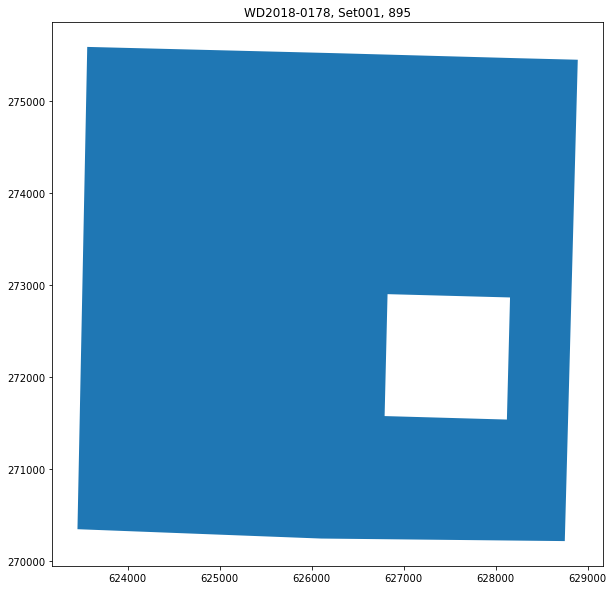

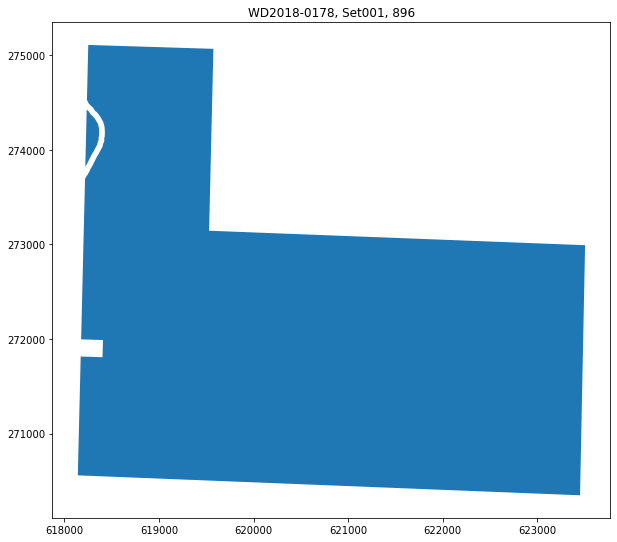

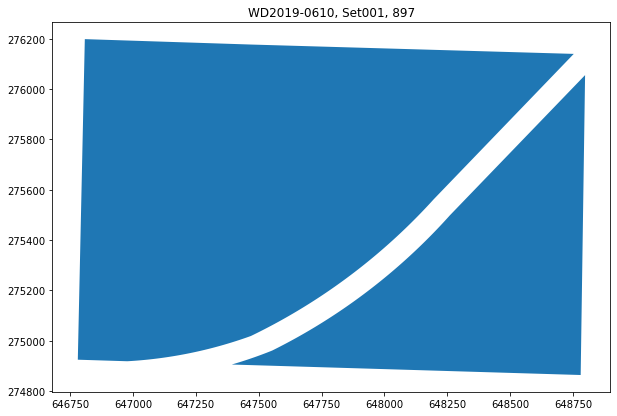

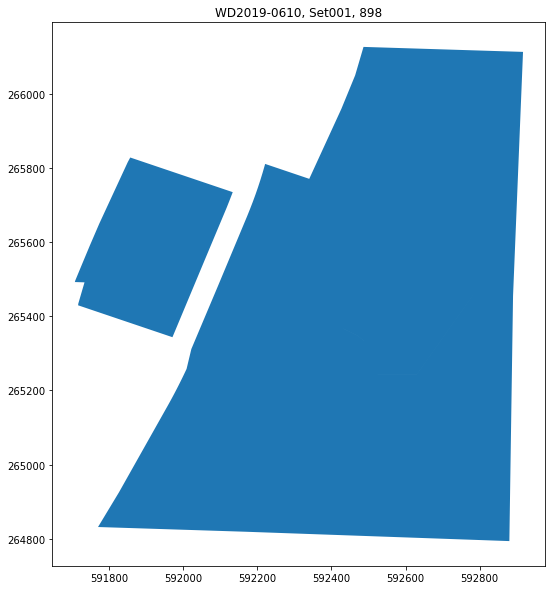

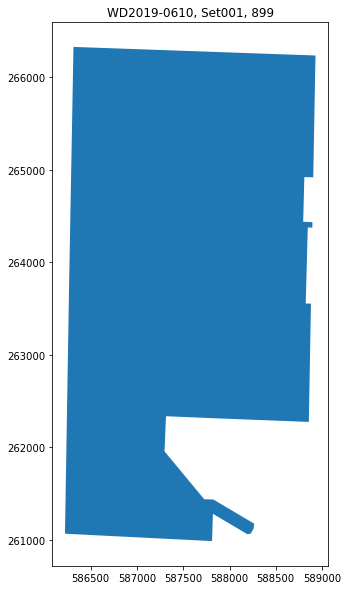

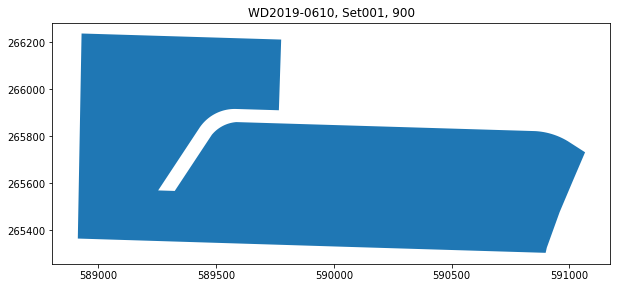

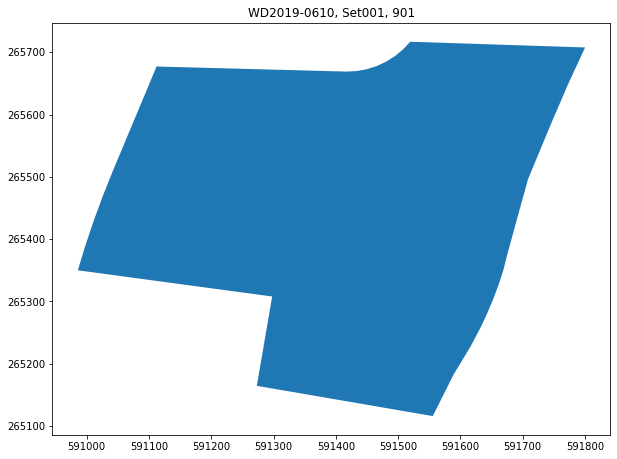

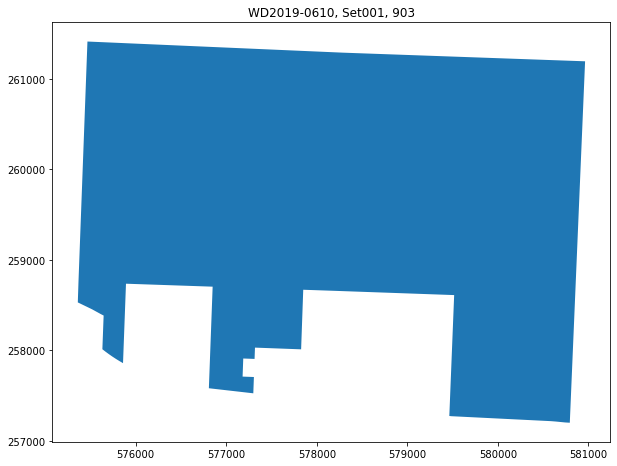

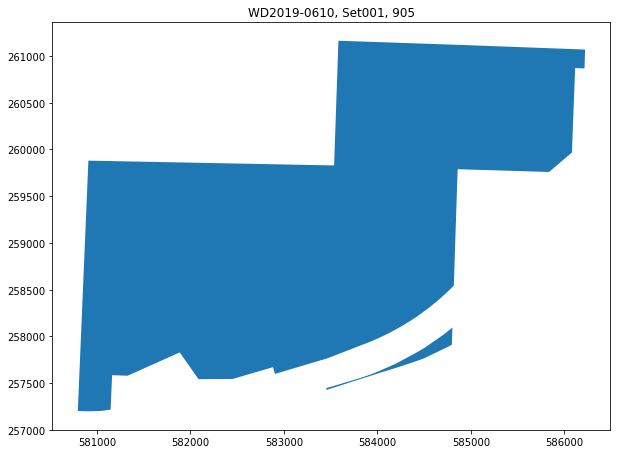

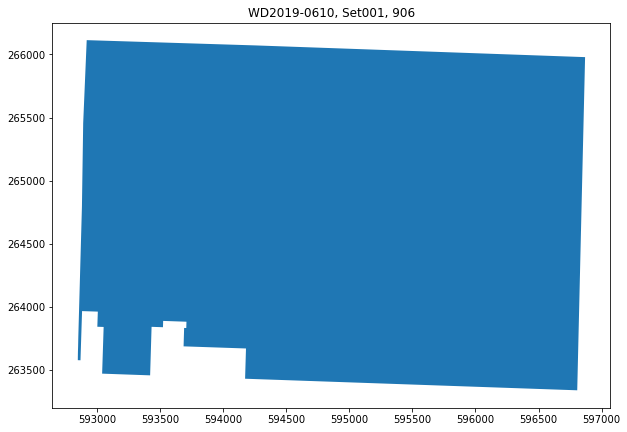

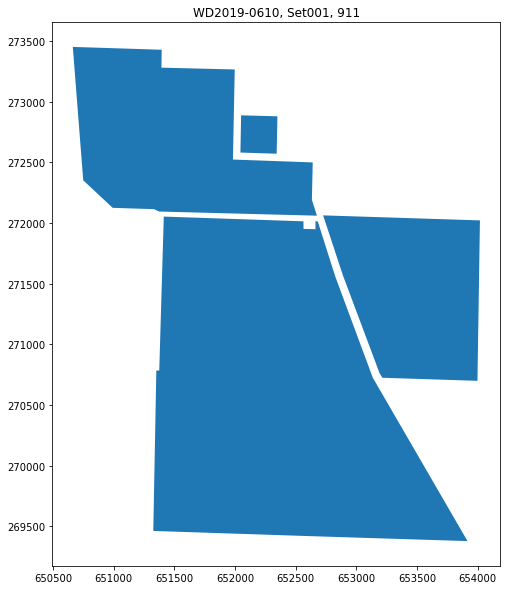

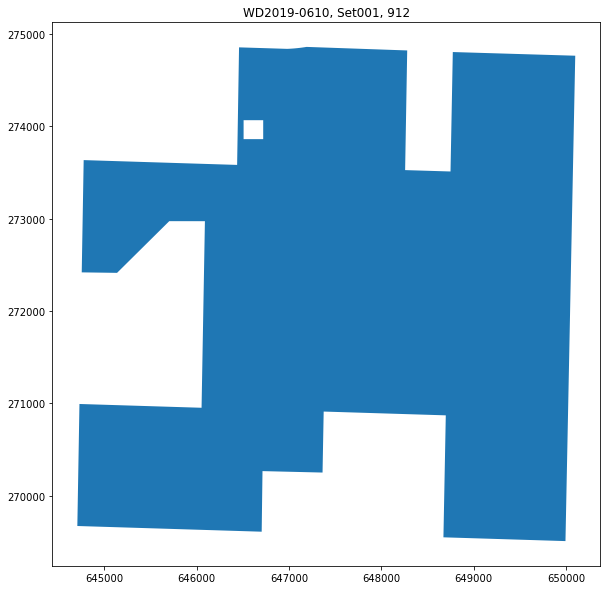

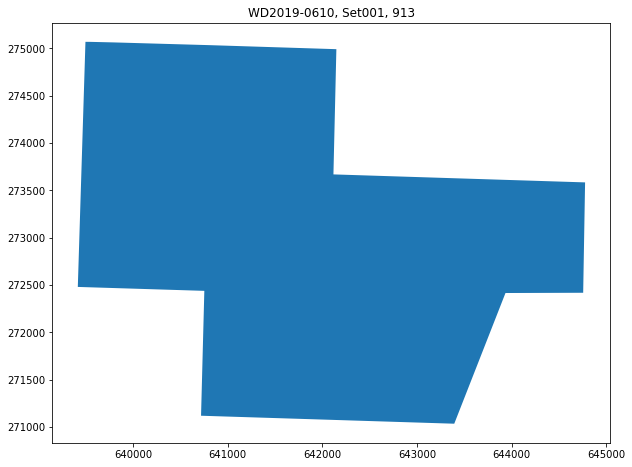

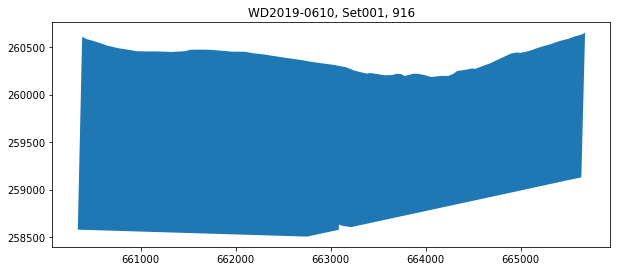

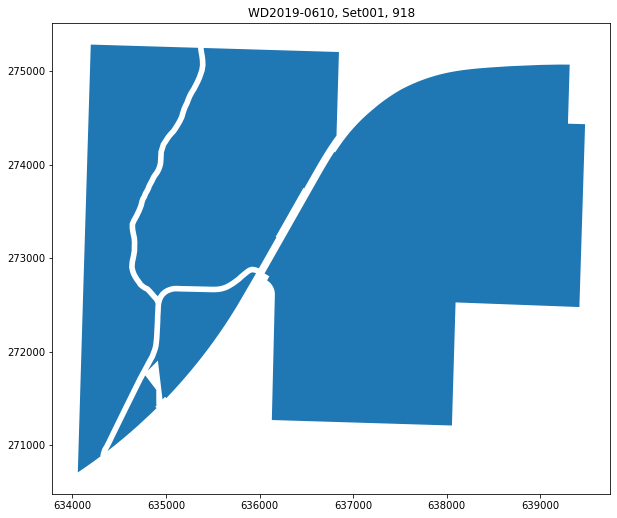

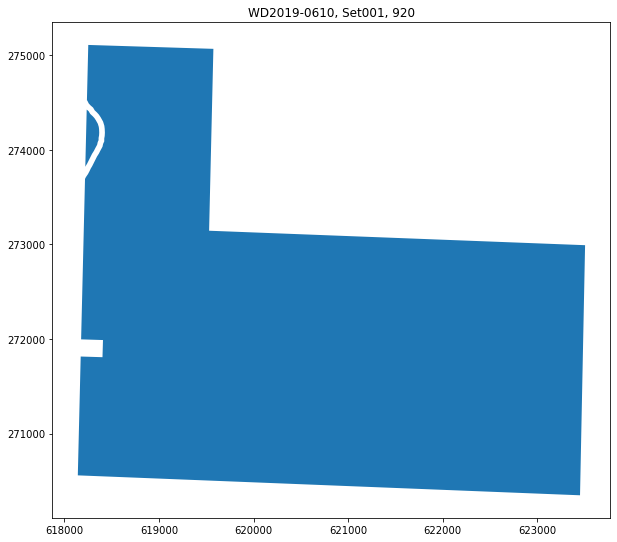

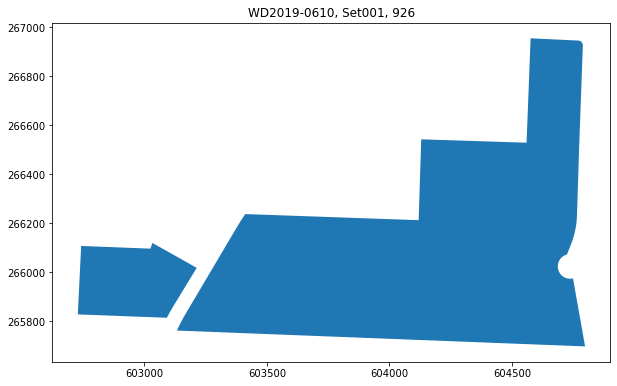

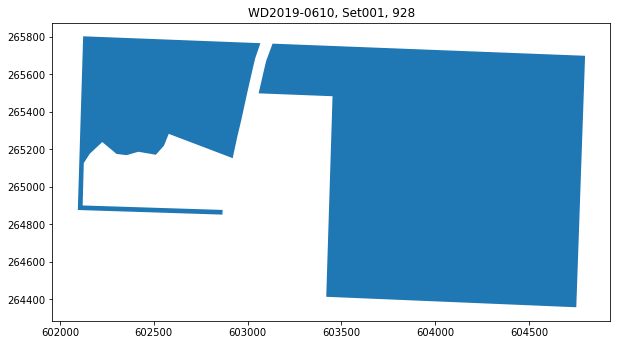

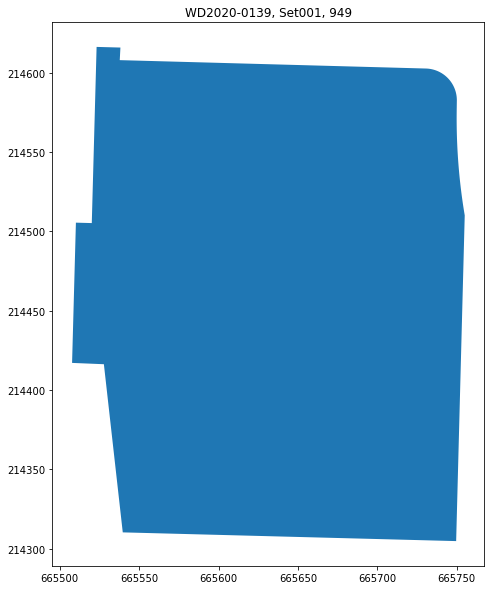

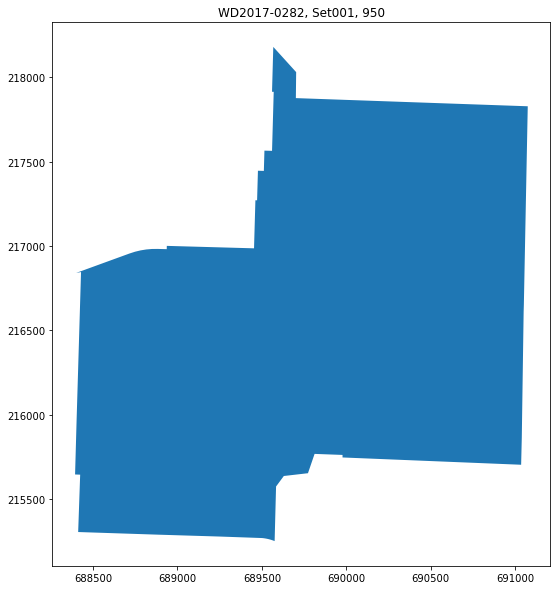

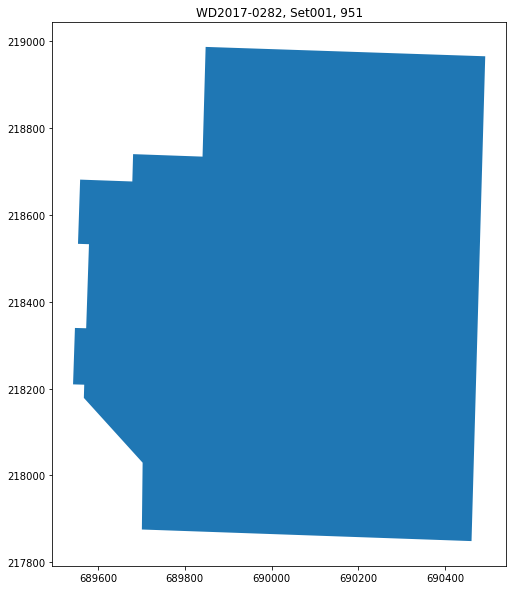

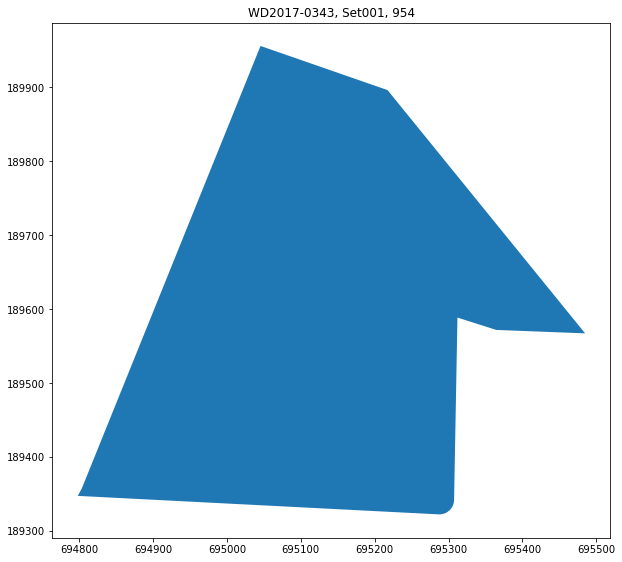

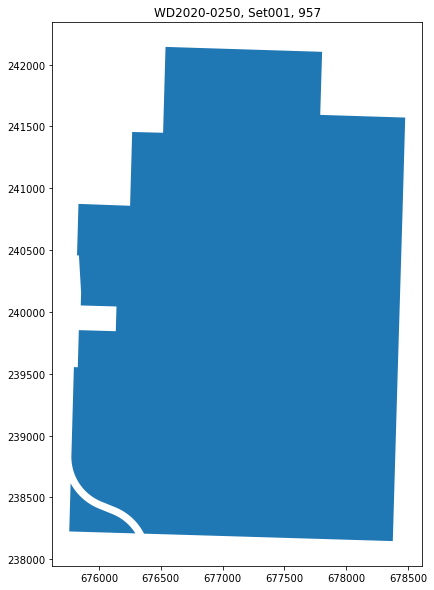

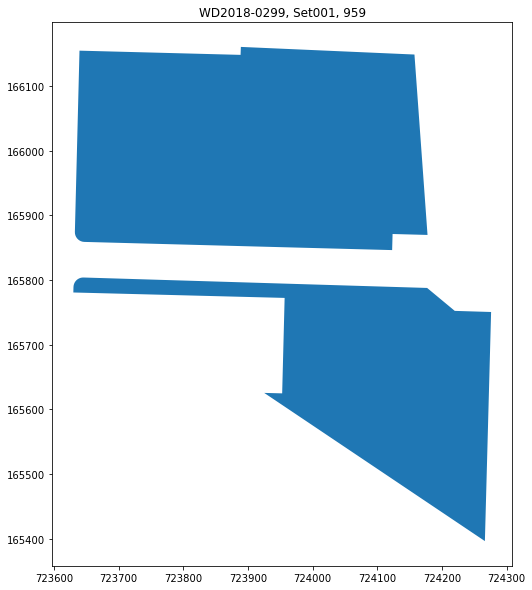

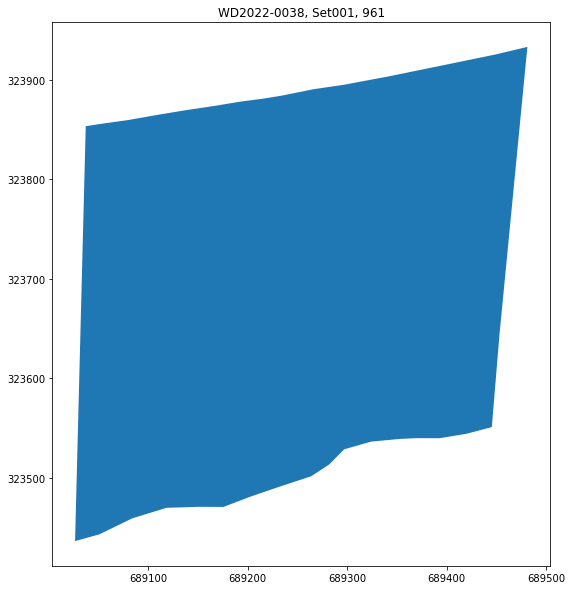

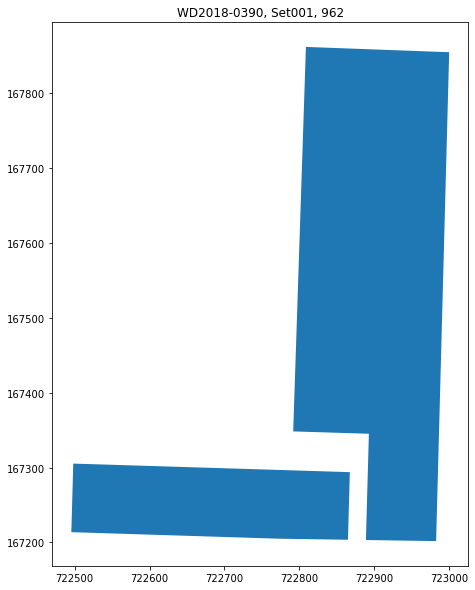

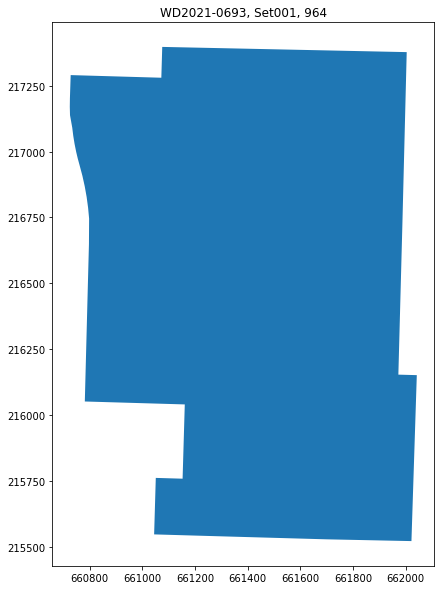

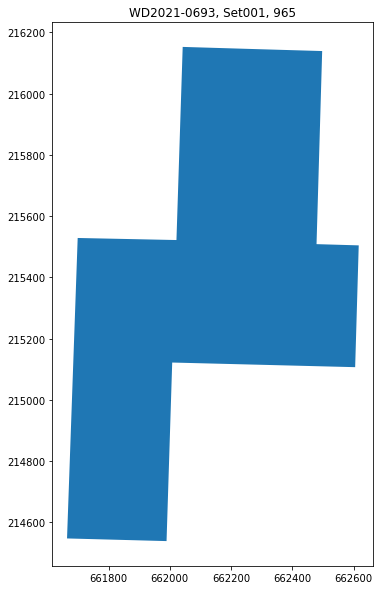

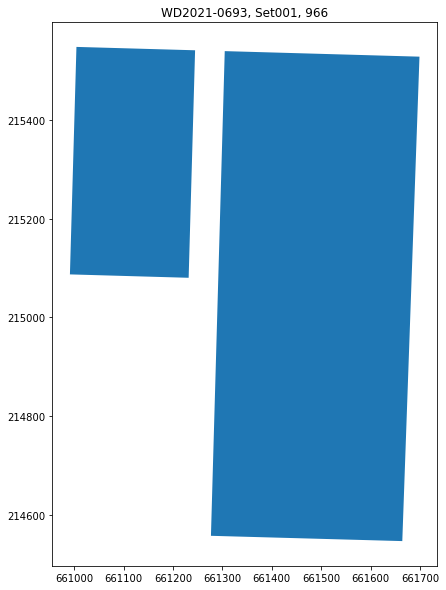

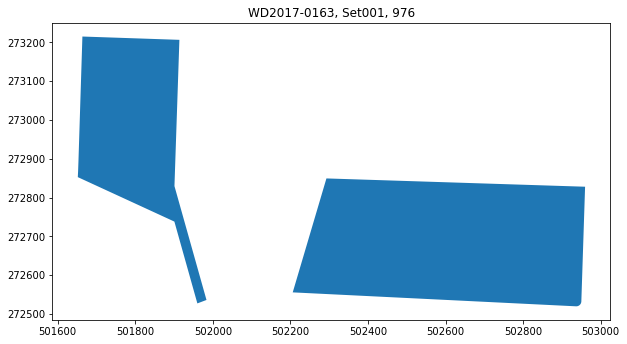

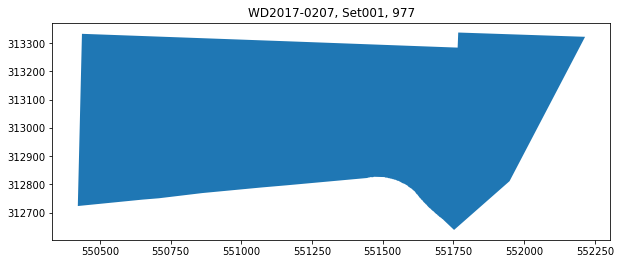

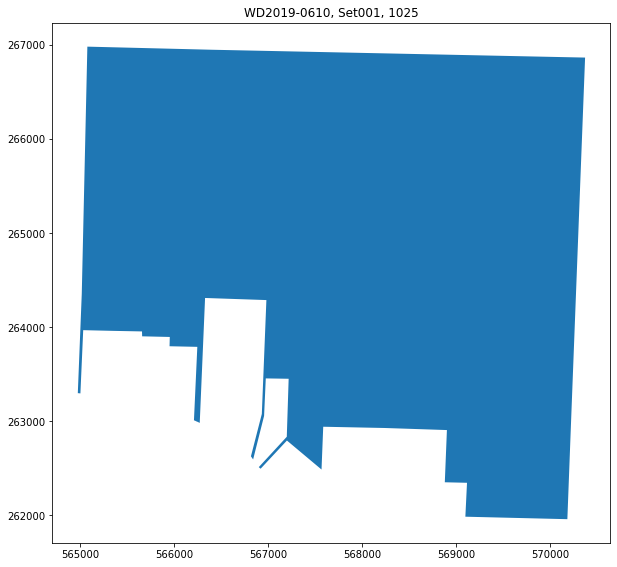

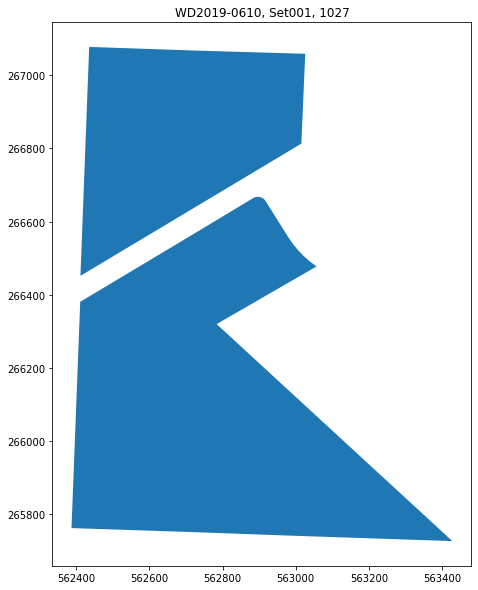

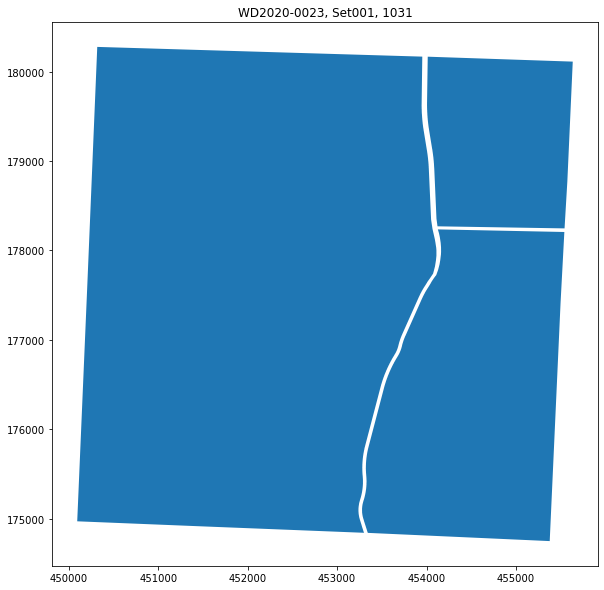

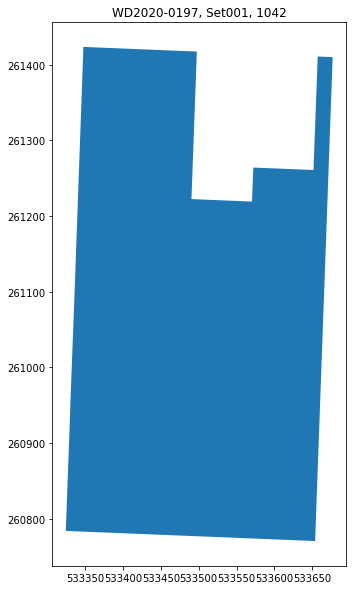

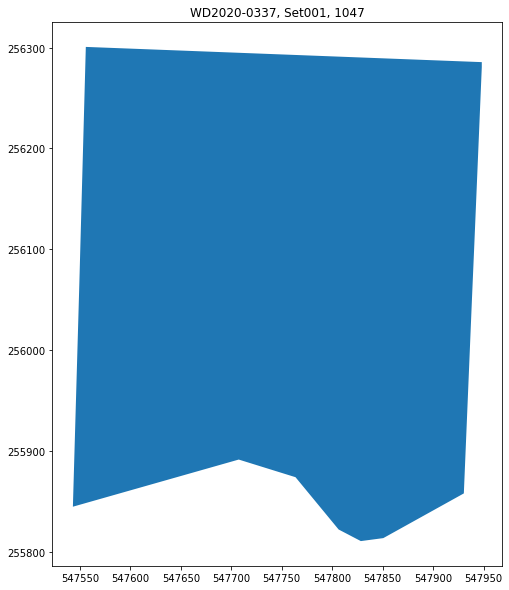

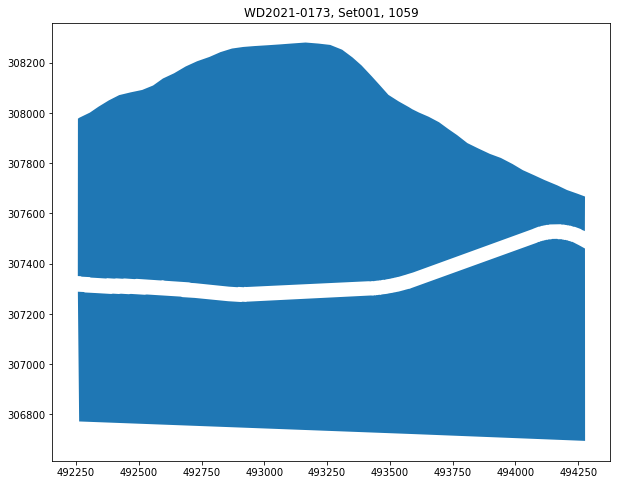

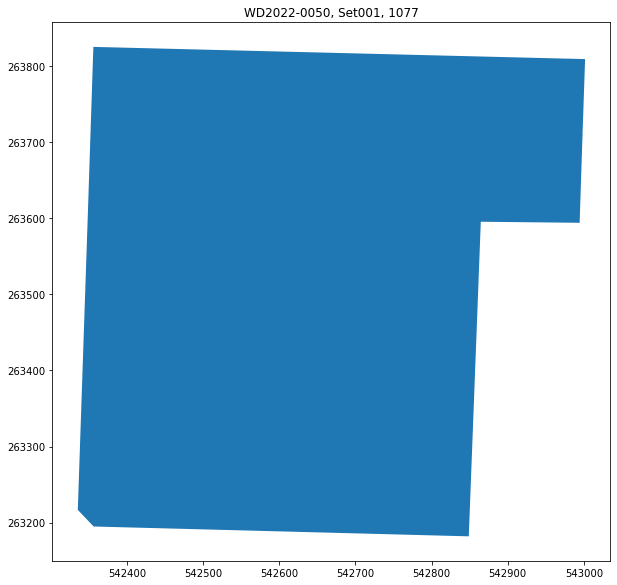

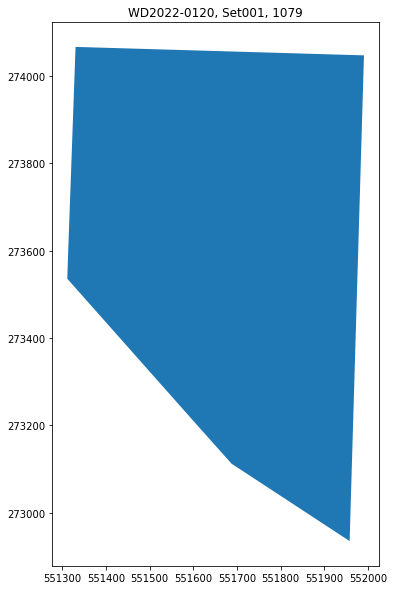

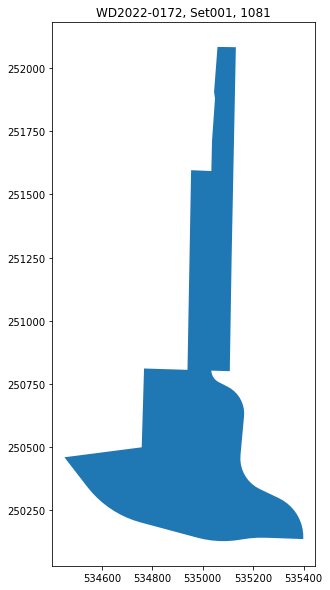

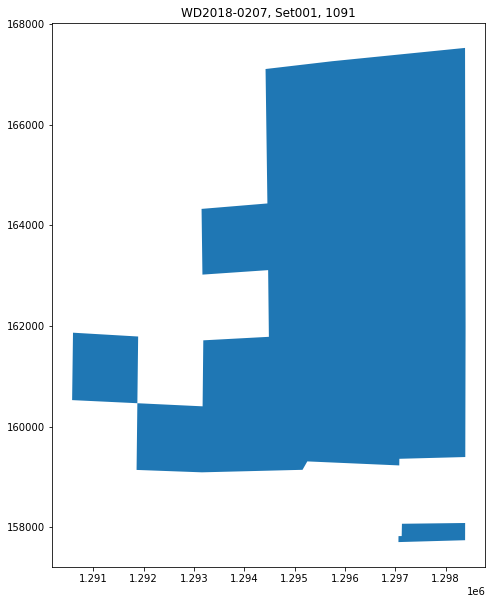

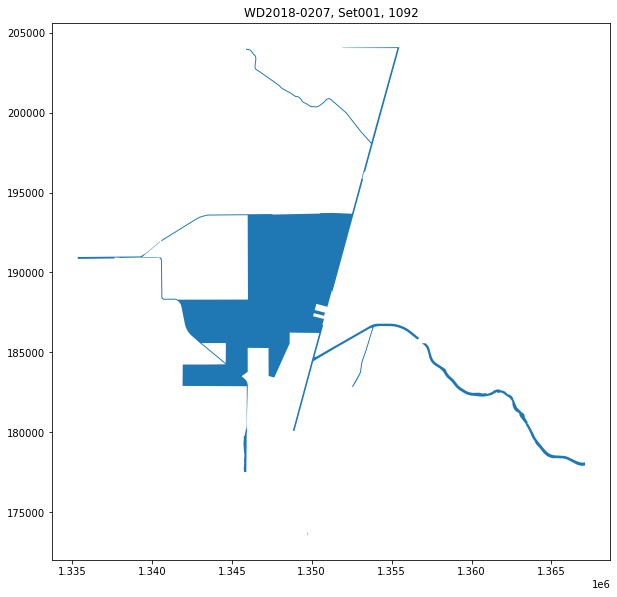

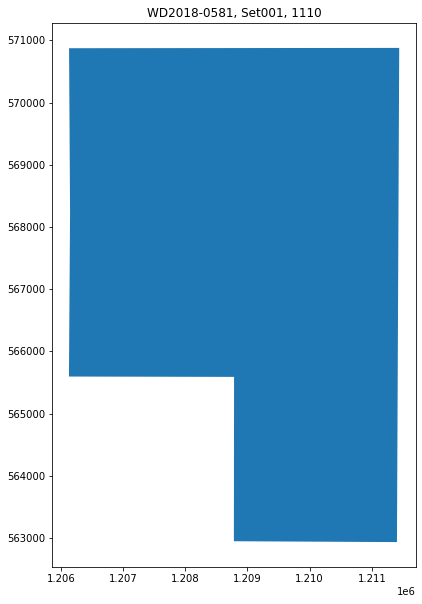

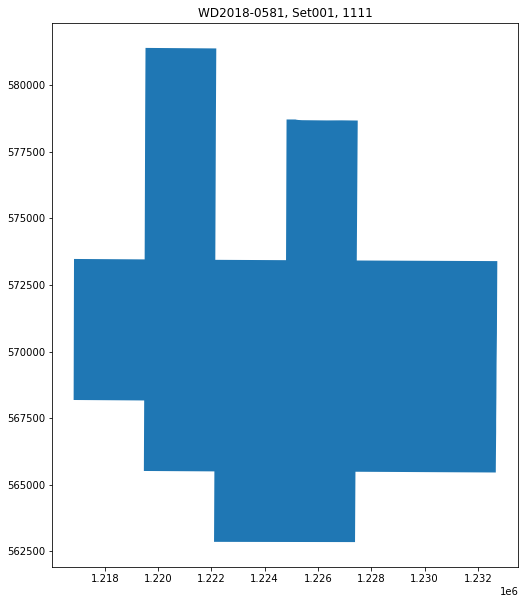

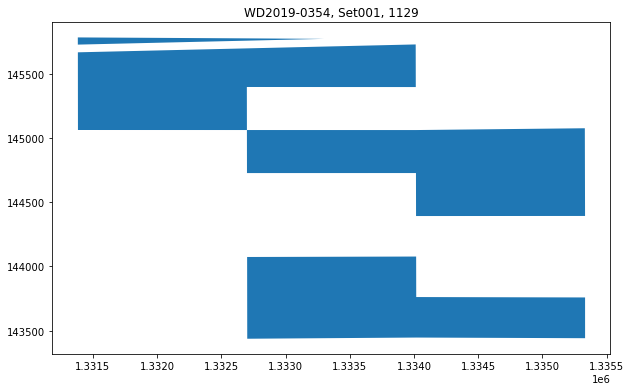

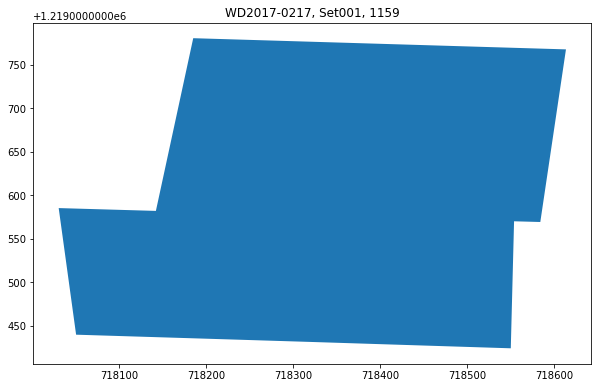

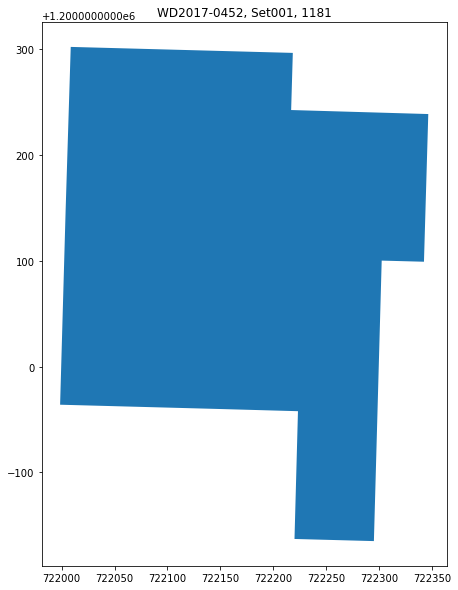

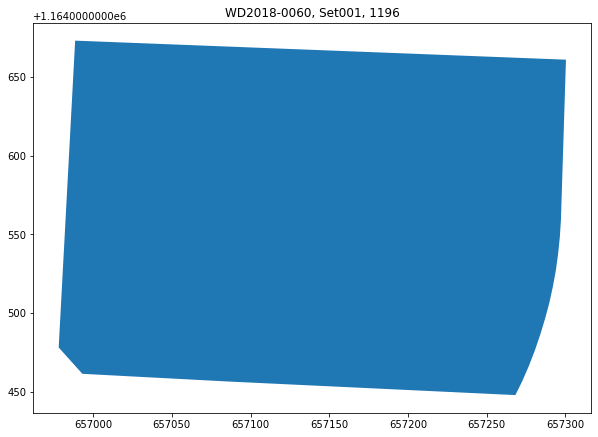

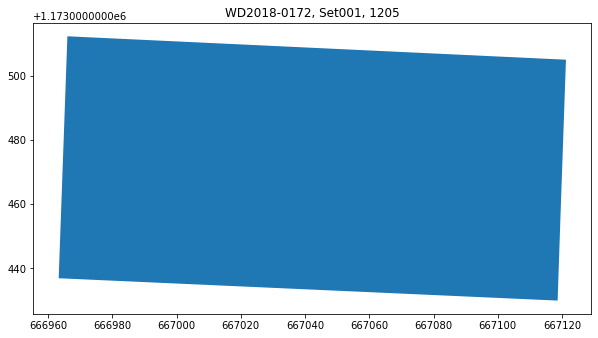

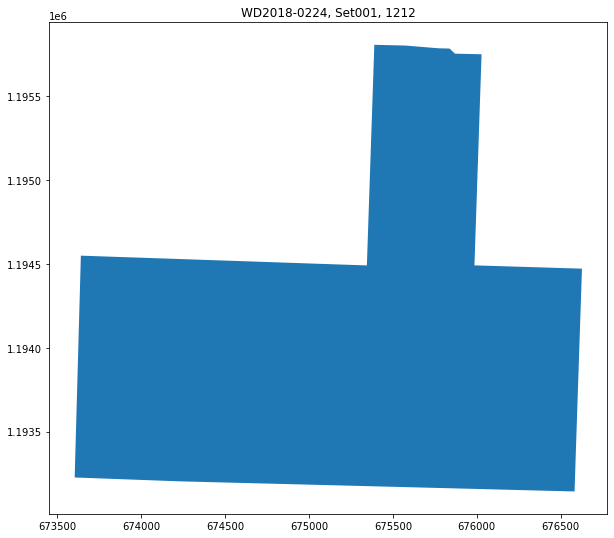

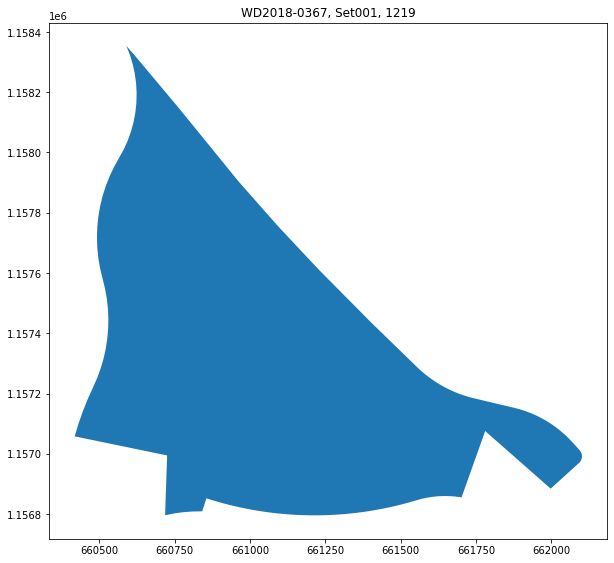

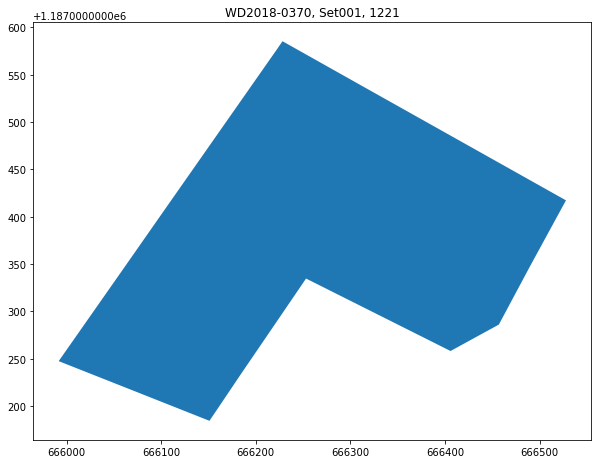

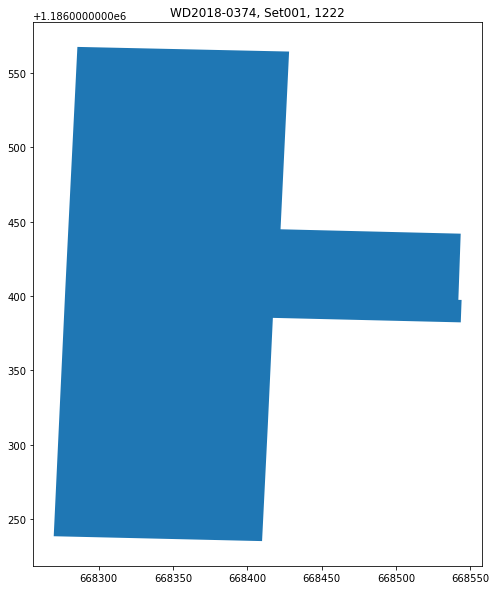

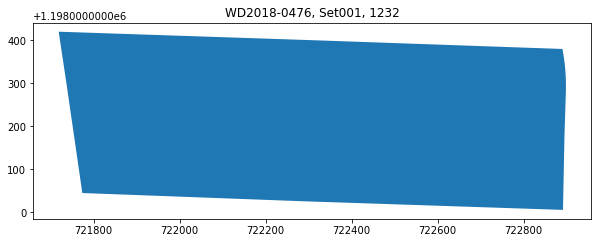

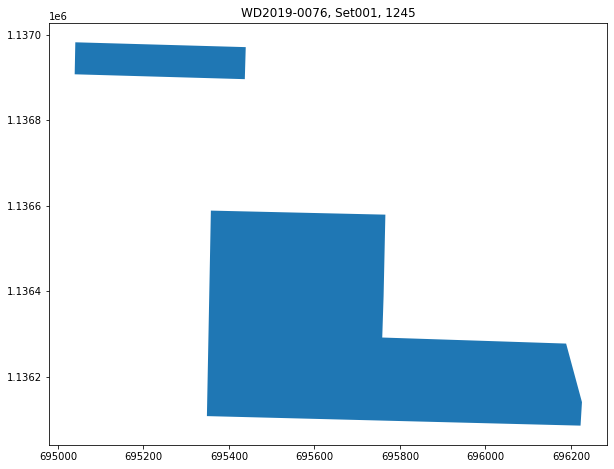

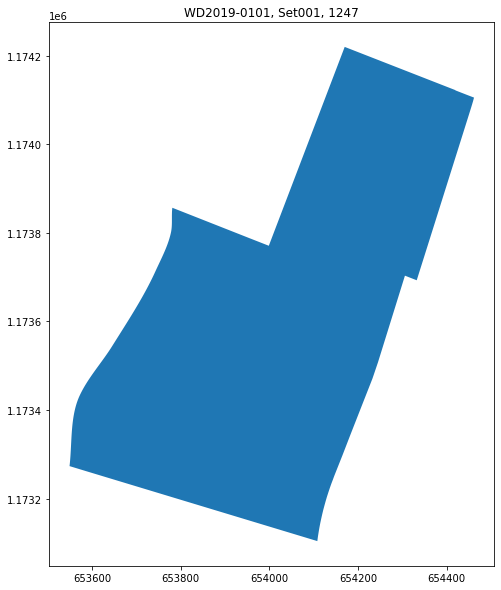

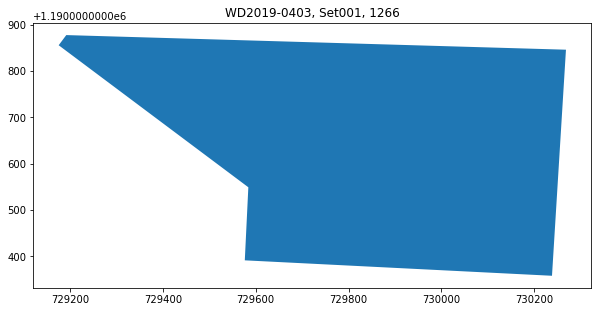

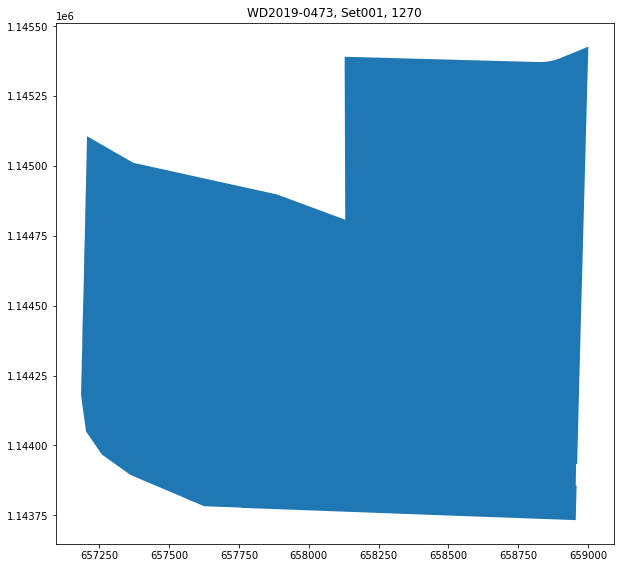

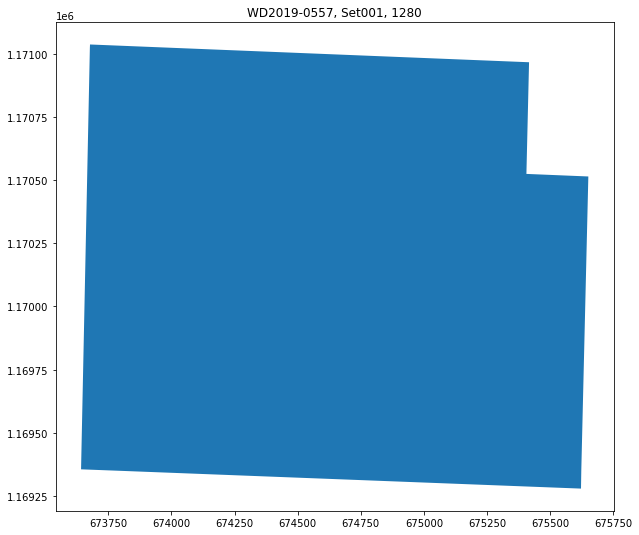

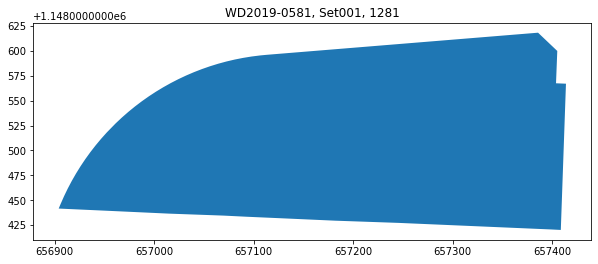

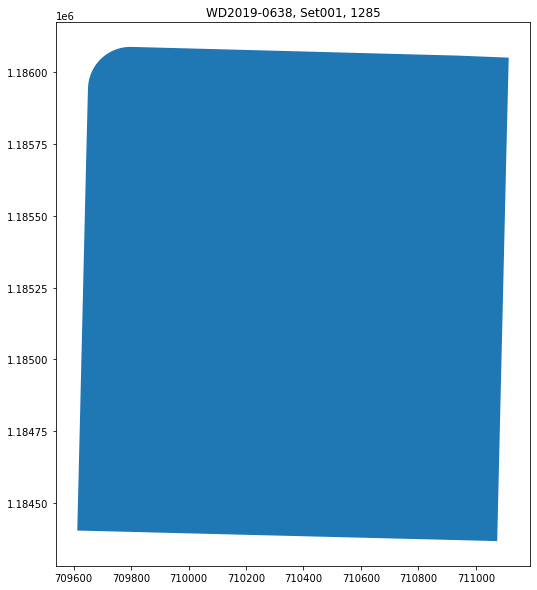

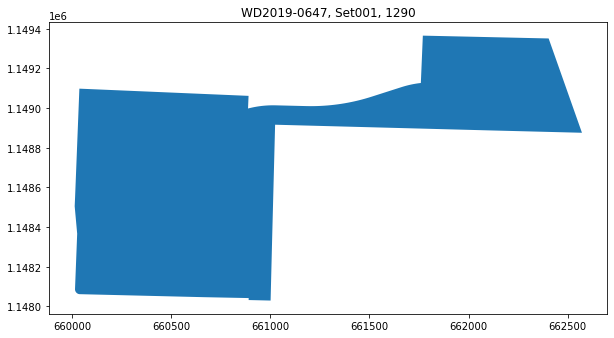

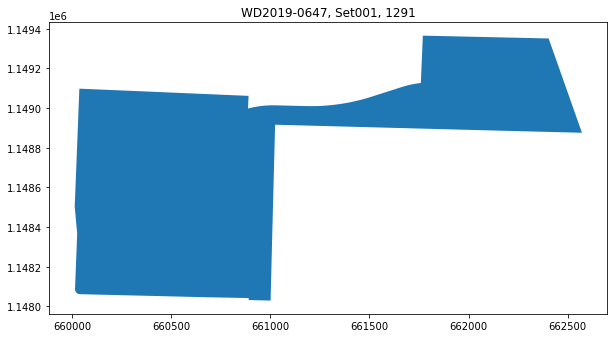

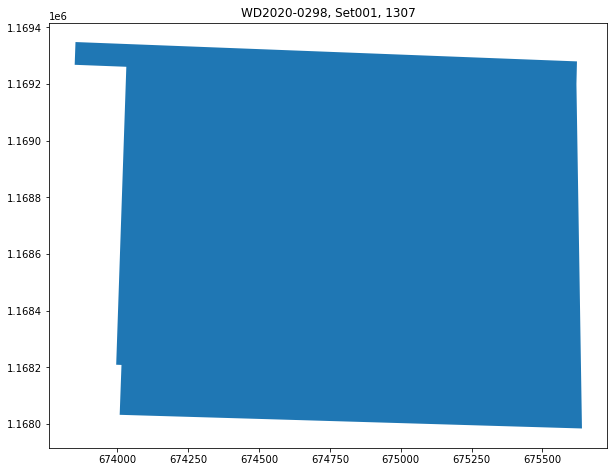

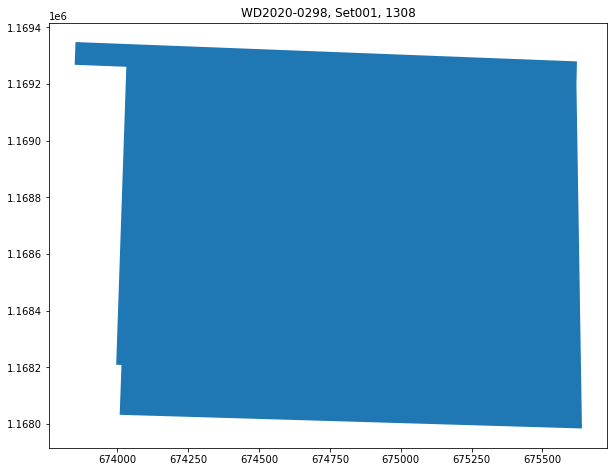

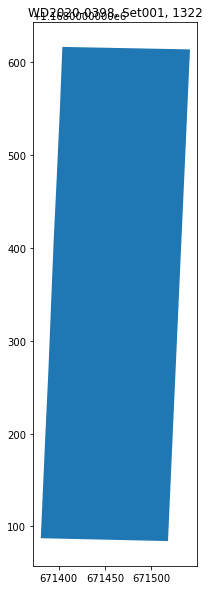

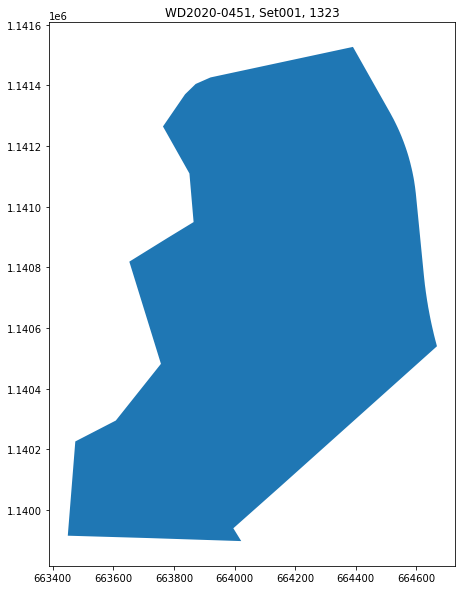

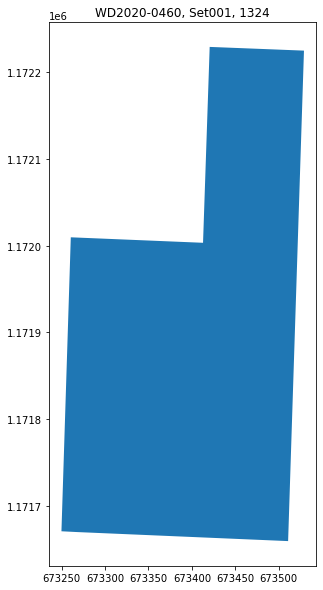

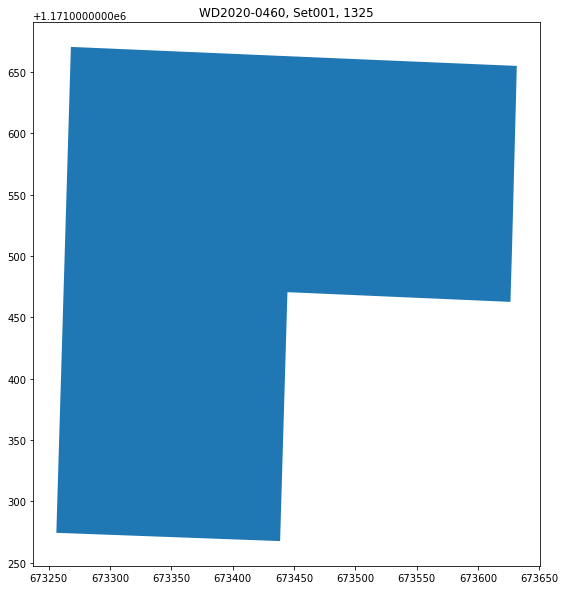

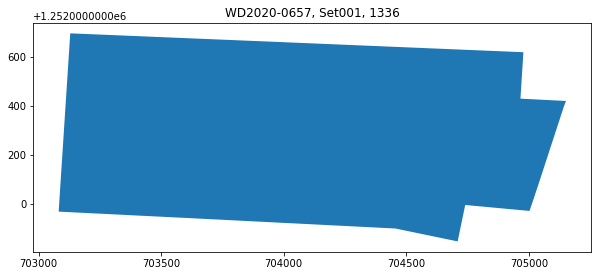

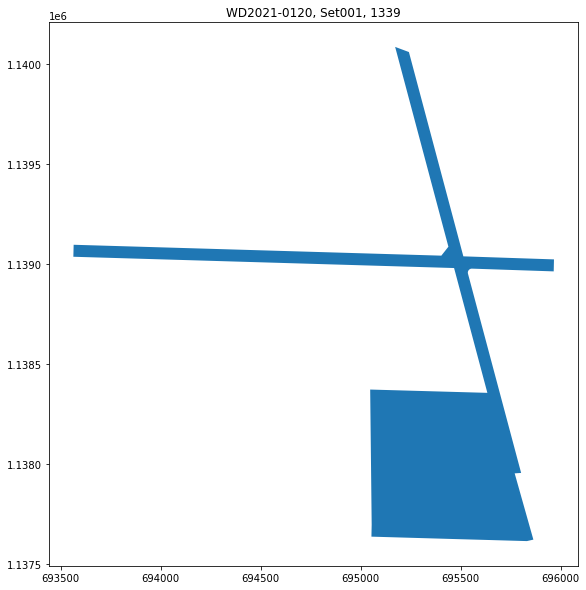

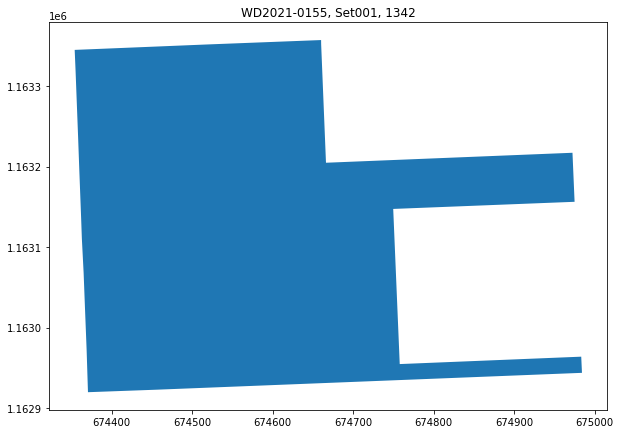

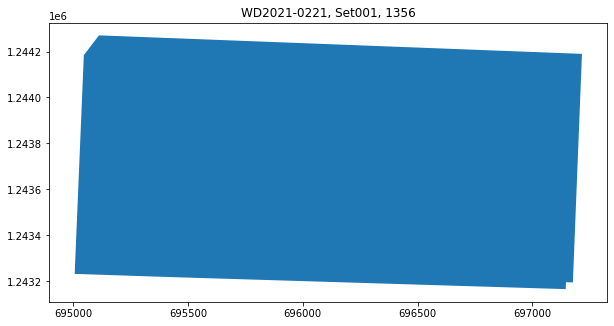

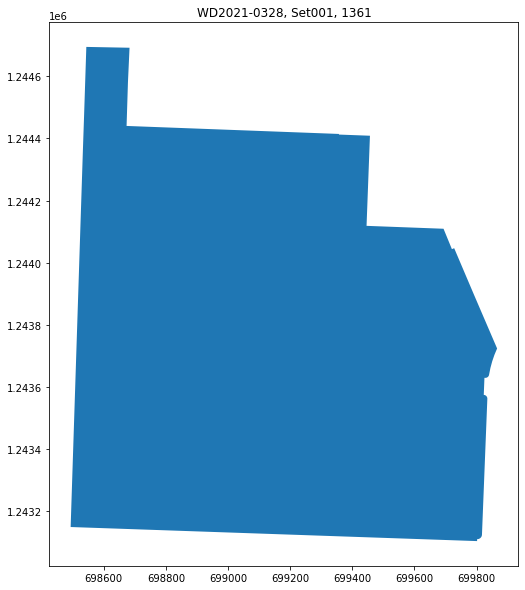

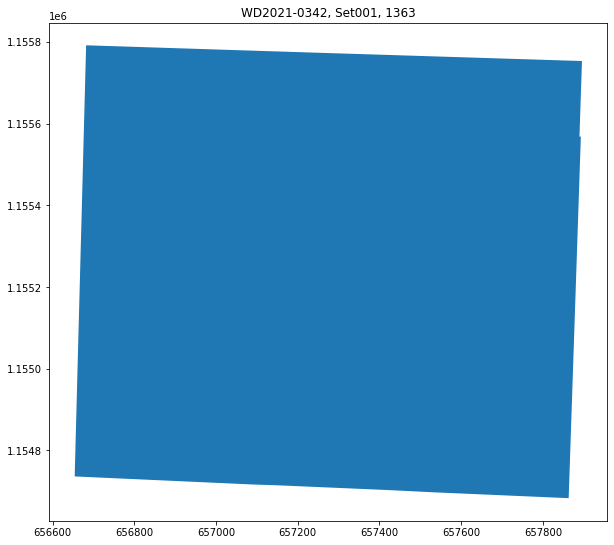

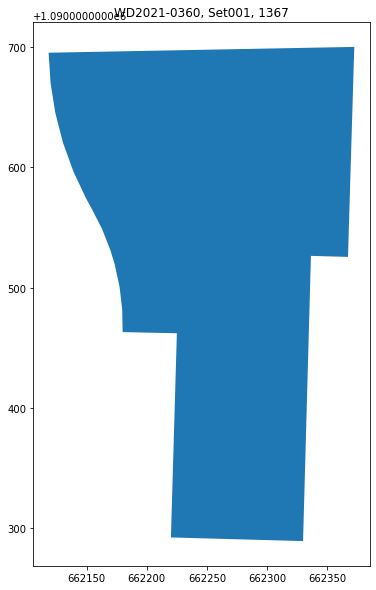

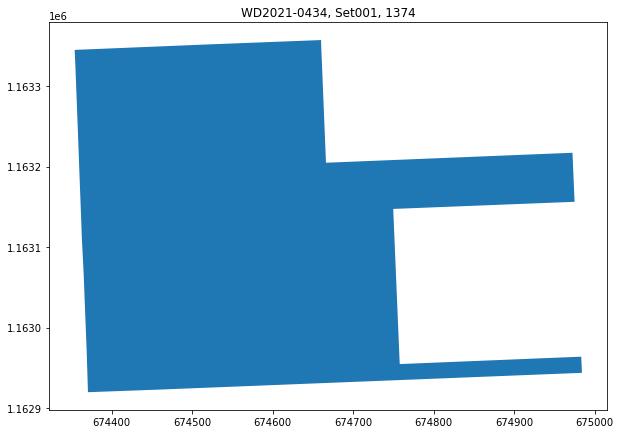

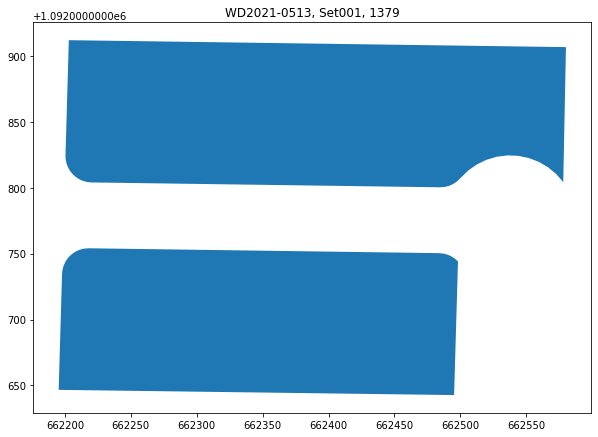

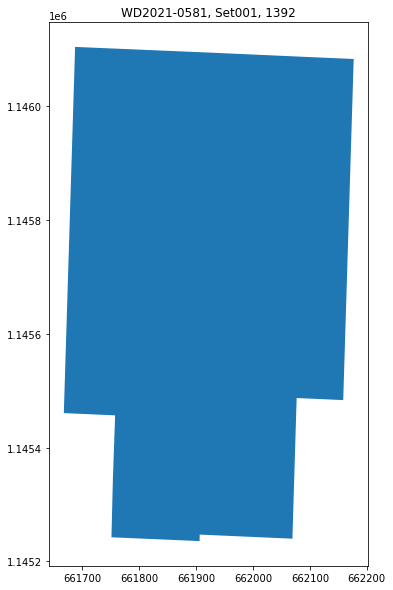

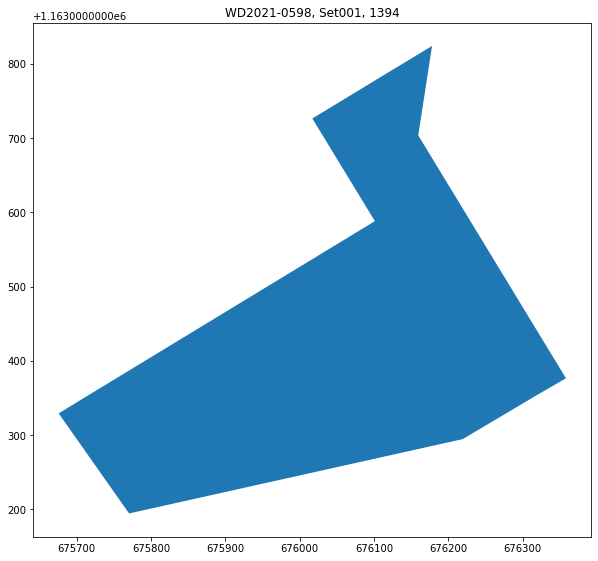

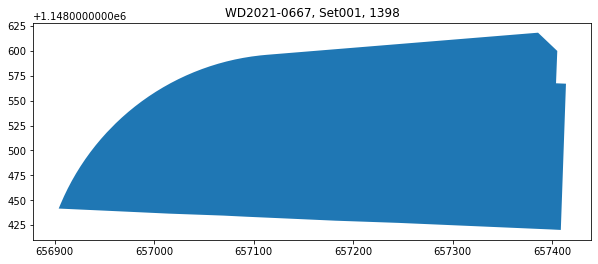

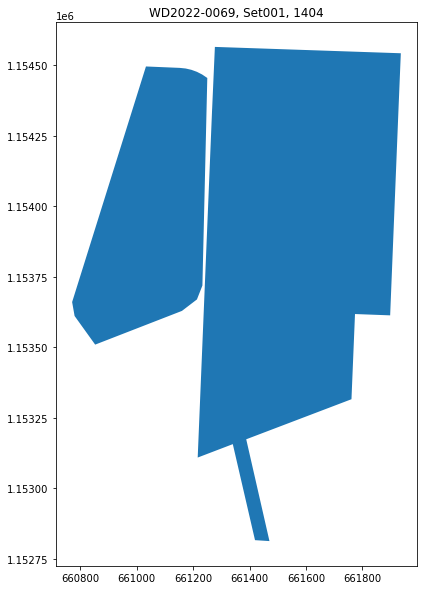

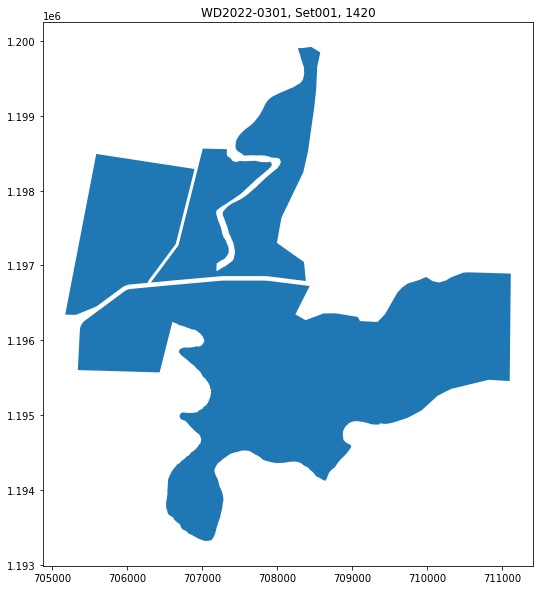

In [33]:
for rid in twp_pcl_mat_dis.record_ID.unique():
    fig, ax = plt.subplots(figsize = (10,10))
    twp_pcl_mat_dis[twp_pcl_mat_dis.record_ID==rid].plot(ax=ax)
    wdID = twp_pcl_mat_dis.loc[twp_pcl_mat_dis.record_ID==rid, 'wdID'].values[0]
    ax.set_title(f"{wdID}, {setID}, {rid}")

In [93]:
digitized = mapped[mapped.code==2]

In [97]:
digitized['area'] = digitized['geometry'].area

In [72]:
cnty = gpd.read_file(r'X:\Data\State\ORCnty2015.shp')

In [82]:
cnty=cnty.to_crs(epsg=2992)

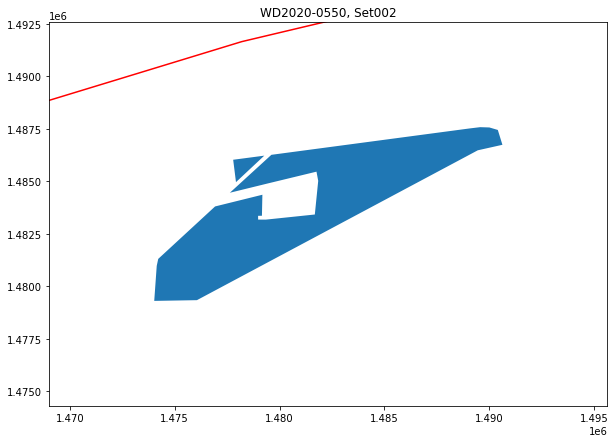

In [106]:
for wid in digitized[digitized.area >= 40000000].wdID:
    fig, ax = plt.subplots(figsize = (10,10))
    b = digitized[digitized.wdID==wid]
    xmin, ymin, xmax, ymax = b.total_bounds
    pad = 5000
    ax.set_xlim(xmin-pad, xmax+pad)
    ax.set_ylim(ymin-pad, ymax+pad)
    base = b.plot(ax=ax)
    cnty.boundary.plot(ax=base, color='red')
    ax.set_title(f"{wid}, {setID}")

In [111]:
sa_gdf = get_all_SA(num=4)

In [115]:
wid = 'WD2022-0083'
fig, ax = plt.subplots(figsize = (10,10))
p = sa_gdf[sa_gdf.wdID == wid]
p.plot(ax=ax)
ax.set_title(f"{wid}, {'Set00'+str(p.SetID.values[0])}")

Text(0.5, 1.0, 'WD2022-0083, Set004')

In [37]:
wd_df = get_all_wd(num=4)

In [39]:
wd_df.columns

Index(['wetdet_delin_number', 'trsqq', 'parcel_id', 'address_location_desc',
       'city', 'county', 'site_name', 'site_desc', 'latitude', 'longitude',
       'Coord-Source', 'DocumentName', 'DecisionLink', 'is_batch_file',
       'status_name', 'received_date', 'response_date',
       'reissuance_response_date', 'project_id', 'site_id', 'record_ID',
       'notes', 'recyear', 'IDyear', 'missinglot'],
      dtype='object')

In [114]:
wd_df.loc[wd_df.wetdet_delin_number=='WD2020-0271', :]

wetdet_delin_number     trsqq            parcel_id address_location_desc  \
89         WD2020-0271  08N10W27  206,211,212,213,214            SE 19th St   
90         WD2020-0271  08N10W27  206,211,212,213,214            SE 19th St   

         city   county                  site_name                   site_desc  \
89  Warrenton  Clatsop  North Coast Business Park  WD2020-0271 re-delineation   
90  Warrenton  Clatsop  North Coast Business Park  WD2020-0271 re-delineation   

     latitude   longitude  ... received_date response_date  \
89  46.147039 -123.908392  ...    2020-05-14    2021-01-04   
90  46.147039 -123.908392  ...    2020-05-14    2021-01-04   

   reissuance_response_date project_id site_id record_ID notes recyear  \
89                      NaN    79936.0  132894        90          2020   
90                      NaN    42028.0  132894        91          2020   

    IDyear  missinglot  
89    2020           N  
90    2020           N  

[2 rows x 25 columns]

In [44]:
wd_df.county.unique()

array(['Clatsop', 'Coos', 'Deschutes', 'Harney', 'Jackson', 'Josephine',
       'Lake', 'Marion', 'Baker', 'Benton', 'Clackamas', 'Morrow',
       'Columbia', 'Grant', 'Klamath', 'Lincoln', 'Tillamook',
       'TIllamook', 'Crook', 'Curry', 'Hood River', 'Jefferson', 'Linn',
       'Multnomah', 'Wasco', 'Yamhill', 'Yamhill and Washington'],
      dtype=object)

In [48]:
wd_df.loc[wd_df.county == 'Yamhill and Washington', 'address_location_desc'].values[0]

'Beginning: OR219 in Newberg; OR99W NE of Newberg'